In [ ]:
 
 
 
 # import các thư viện cần dùng
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [ ]:
# tải dữ liệu
from google.colab import files
uploaded = files.upload()

Saving dataset_train.csv to dataset_train (1).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['dataset_train.csv']))

In [ ]:
# In số lượng hàng và cột trong khung dữ liệu
print("{} rows and {} columns".format(df.shape[0], df.shape[1]))

#Hiển thị tên của từng cột trong khung dữ liệu
print(df.columns)

# In 10 hàng đầu tiên của khung dữ liệu
print("\n[FIRST 10 ROWS PREVIEW]")
df.head(10)

36275 rows and 19 columns
Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

[FIRST 10 ROWS PREVIEW]


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


In [ ]:
#Số phần tử uniqe trong mỗi cột
unique = df.nunique()
unique.to_frame().T

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,36275,5,6,8,18,4,2,7,352,2,12,31,5,2,9,59,3930,6,2


In [ ]:
# thống kê dữ liệu
df.iloc[:, :-1].describe().T.sort_values(by='std', ascending = False)\
                          .style.background_gradient(cmap="Greens")\
                          .bar(subset=["max"], color='#F8766D')\
                          .bar(subset=["mean"], color='#00BFC4')
# mô tả tệp dữ liệu (cột chứa giá trị là số) với:
#count: tổng số các bản ghi khác null trong dữ liệu
#min, max: giá trị lớn nhất nhỏ nhất trong dải dữ liệu
#mean: giá trị trung bình
#std: Độ lệch chuẩn của cột
#25%: Phần tư thứ nhất (phần trăm thứ 25) của cột
#50%: Trung vị (phân vị thứ 50) của cột
#75%: Phần tư thứ ba (phần trăm thứ 75) của cột

,count,mean,std,min,25%,50%,75%,max
lead_time,36275.000000,85.232557,85.930817,0.000000,17.000000,57.000000,126.000000,443.000000
avg_price_per_room,36275.000000,103.423539,35.089424,0.000000,80.300000,99.450000,120.000000,540.000000
arrival_date,36275.000000,15.596995,8.740447,1.000000,8.000000,16.000000,23.000000,31.000000
arrival_month,36275.000000,7.423653,3.069894,1.000000,5.000000,8.000000,10.000000,12.000000
no_of_previous_bookings_not_canceled,36275.000000,0.153411,1.754171,0.000000,0.000000,0.000000,0.000000,58.000000
no_of_week_nights,36275.000000,2.204300,1.410905,0.000000,1.000000,2.000000,3.000000,17.000000
no_of_weekend_nights,36275.000000,0.810724,0.870644,0.000000,0.000000,1.000000,2.000000,7.000000
no_of_special_requests,36275.000000,0.619655,0.786236,0.000000,0.000000,0.000000,1.000000,5.000000
no_of_adults,36275.000000,1.844962,0.518715,0.000000,2.000000,2.000000,2.000000,4.000000
no_of_children,36275.000000,0.105279,0.402648,0.000000,0.000000,0.000000,0.000000,10.000000


In [ ]:
 # Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
# Hiển thị số lượng số và không phải số trong khung dữ liệu
print("Number of numerical columns: {}".format(df.select_dtypes(include=np.number).shape[1]))
print("Number of non-numerical columns: {}".format(df.select_dtypes(exclude=np.number).shape[1]))

Number of numerical columns: 14
Number of non-numerical columns: 5


In [ ]:
# Tìm kiếm các giá trị còn thiếu trong khung dữ liệu
print(" Total missing values is {}".format(df.isnull().sum().sum()))
print(" Missing values by column is as follows:")
df.isnull().sum()

 Total missing values is 0
 Missing values by column is as follows:


Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [ ]:
#kiểm tra giá trị trùng lặp
df.duplicated().sum()

0

In [ ]:
#Kiểm tra ngoại lệ
#Các tính năng số và phân loại riêng biệt
num_cols = pd.DataFrame (df, columns= ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 
                                       'lead_time', 'arrival_year', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
                                       'avg_price_per_room', 'no_of_special_requests'])
cat_cols = pd.DataFrame (df, columns= ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'])

In [ ]:
#Tách các tính năng số và phân loại thành các danh sách khác nhau
numerical_columns = list(df.loc[:,['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 
                                   'lead_time', 'arrival_year', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 
                                   'avg_price_per_room', 'no_of_special_requests']])
categorical_columns = list(df.loc[:,['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']])

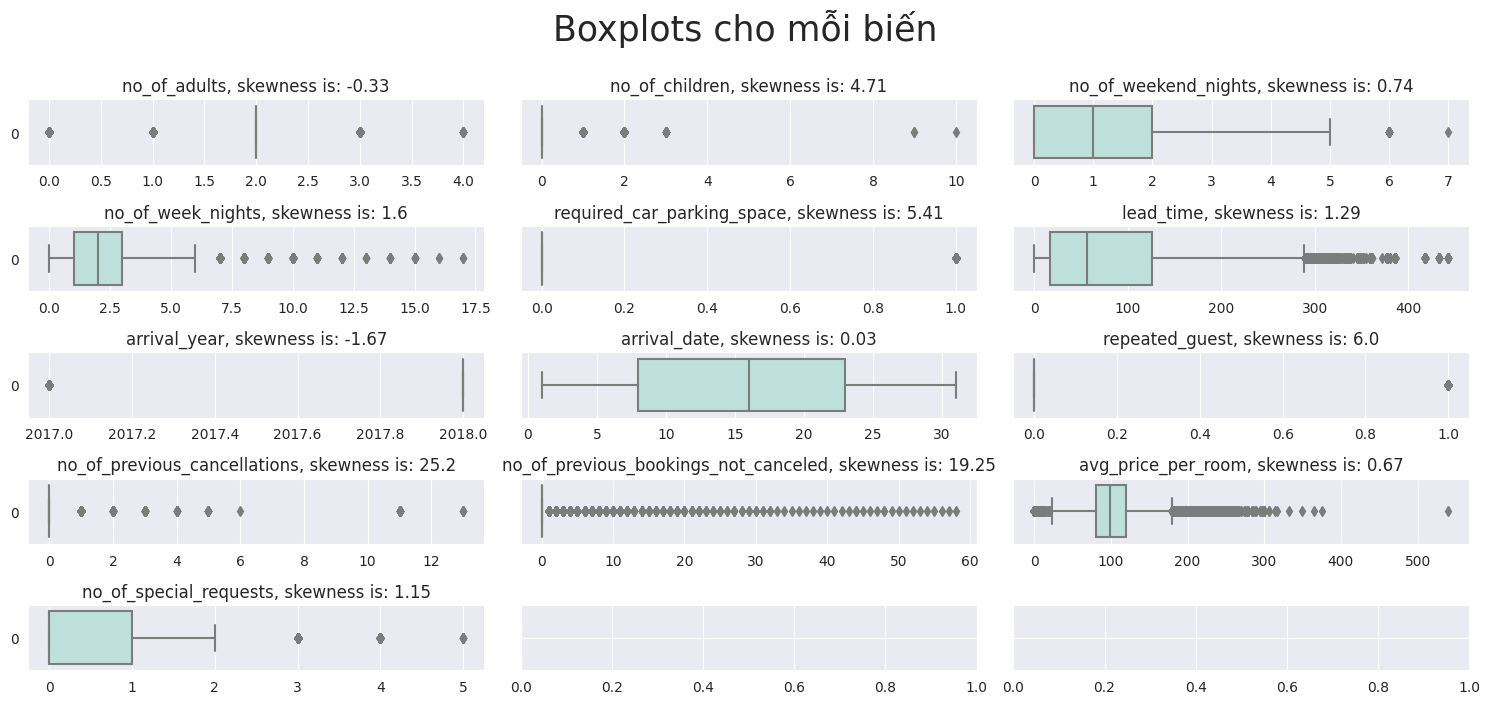

In [ ]:
#Trực quan hóa các tính năng số bằng boxplots
sns.set_style('darkgrid')
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(15,7))
    fig.suptitle(suptitle, y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', color ='#b7e7dd', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True), 2)))
        
boxplots_custom(dataset=df, columns_list=num_cols, rows=5, cols=3, suptitle='Boxplots cho mỗi biến')
plt.tight_layout()

In [ ]:
#Tính toán ngoại lệ 
#Tính toán IQR cho mỗi cột trong tập dữ liệu (bỏ)
Q1 = num_cols.quantile(0.25)
Q3 = num_cols.quantile(0.75)
IQR = Q3 - Q1

# Xác định các ngoại lệ bằng phương pháp IQR
outliers = ((num_cols < (Q1 - 1.5 * IQR)) | (num_cols > (Q3 + 1.5 * IQR)))

# Đếm số lượng ngoại lệ cho mỗi biến
num_outliers = outliers.sum()

# Number of outliers for each variable
num_outliers.to_frame().T


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,10167,2698,21,324,1124,1331,6514,0,930,338,812,1696,761


In [ ]:
from typing import Tuple
from sklearn.base import BaseEstimator, TransformerMixin


def find_boxplot_boundaries(
    col: pd.Series, whisker_coeff: int = 1
) -> Tuple[int, int]:
    """Findx minimum and maximum in boxplot.

    Args:
        col: a pandas serires of input.
        whisker_coeff: whisker coefficient in box plot
    """
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - whisker_coeff * IQR
    upper = Q3 + whisker_coeff * IQR
    return lower, upper


class BoxplotOutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self, whisker_coeff: int = 1.5):
        self.whisker = whisker_coeff
        self.lower = None
        self.upper = None

    def fit(self, X: pd.Series):
        self.lower, self.upper = find_boxplot_boundaries(X, self.whisker)
        return self

    def transform(self, X):
        return X.clip(self.lower, self.upper)

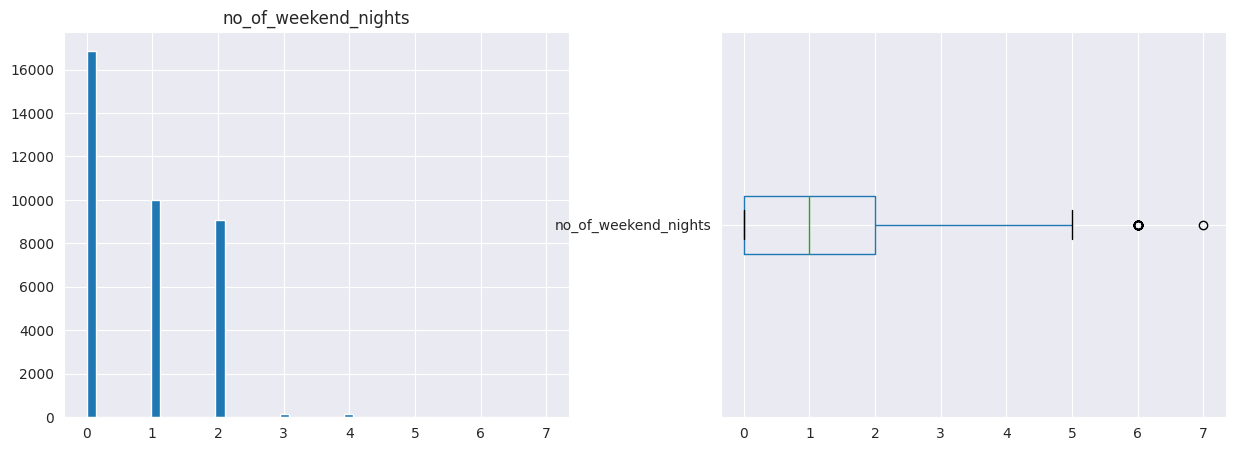

In [ ]:
#xử lý ngoại lệ thuộc tính no_of_weekend_nights
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
df[["no_of_weekend_nights"]].hist(bins=50, ax=axes[0]);
df[["no_of_weekend_nights"]].boxplot(ax=axes[1], vert=False);

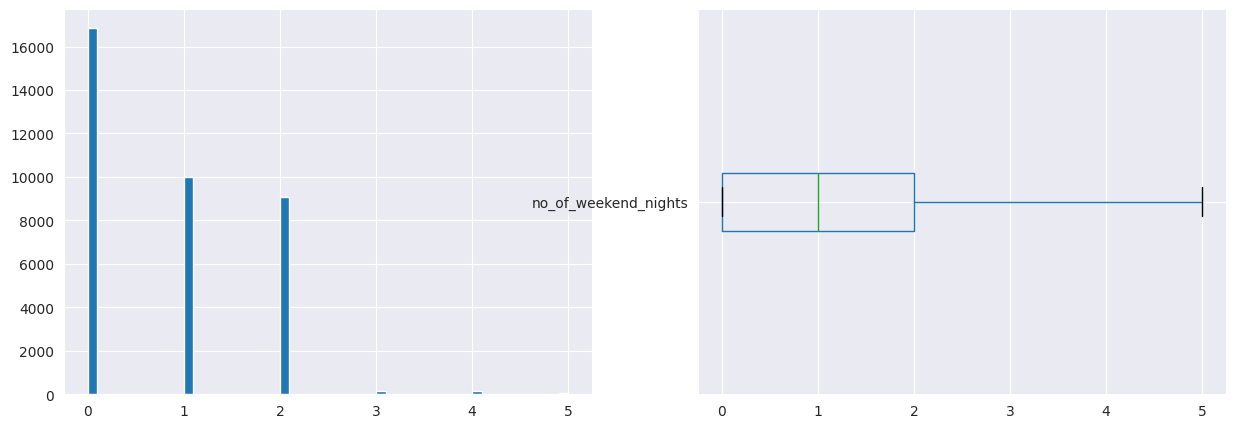

In [ ]:
clipped_total_rooms = BoxplotOutlierClipper().fit_transform(df["no_of_weekend_nights"])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
clipped_total_rooms.hist(bins=50, ax=axes[0])
clipped_total_rooms.to_frame().boxplot(ax=axes[1], vert=False);

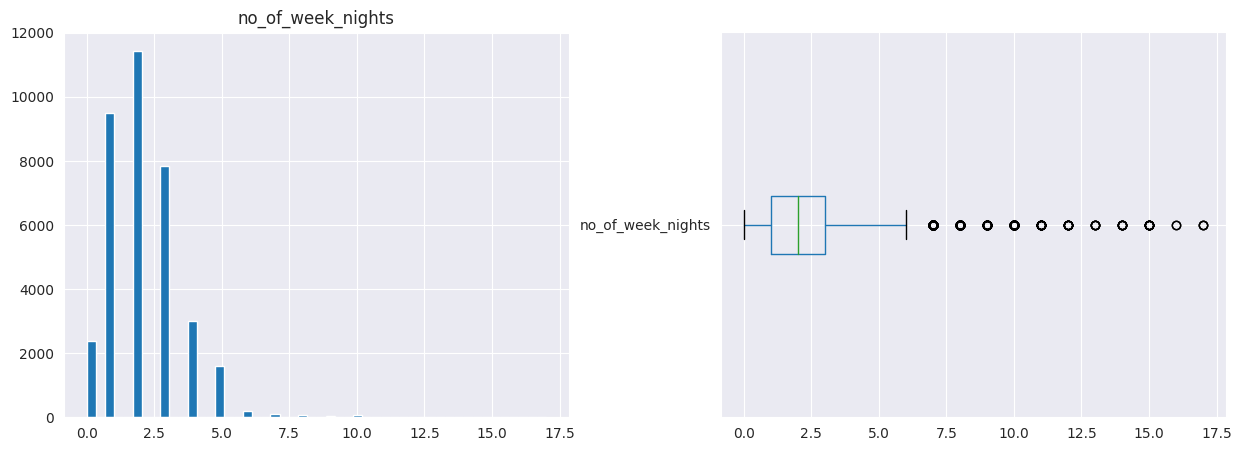

In [ ]:
#xử lý ngoại lệ thuộc tính no_of_week_nights
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
df[["no_of_week_nights"]].hist(bins=50, ax=axes[0]);
df[["no_of_week_nights"]].boxplot(ax=axes[1], vert=False);

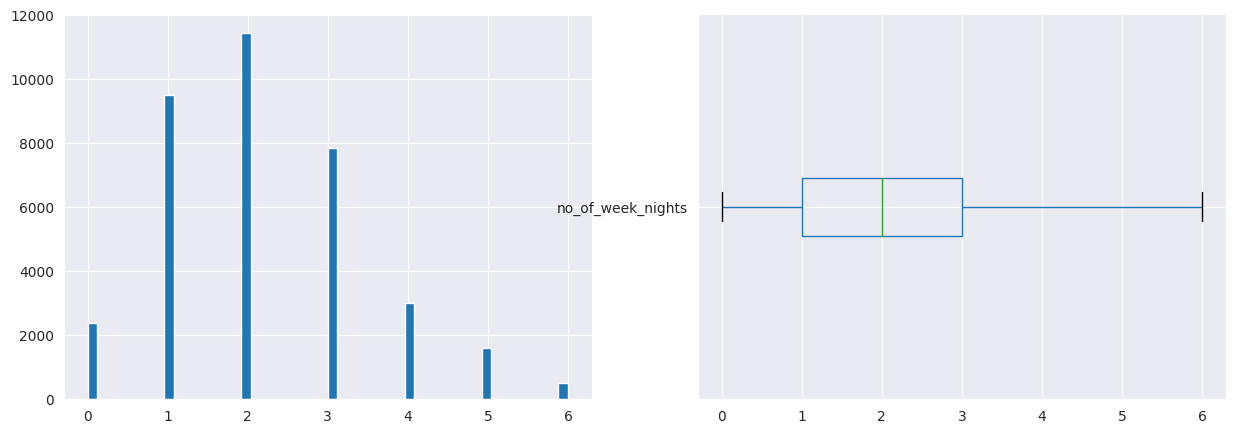

In [ ]:
clipped_total_rooms = BoxplotOutlierClipper().fit_transform(df["no_of_week_nights"])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
clipped_total_rooms.hist(bins=50, ax=axes[0])
clipped_total_rooms.to_frame().boxplot(ax=axes[1], vert=False);

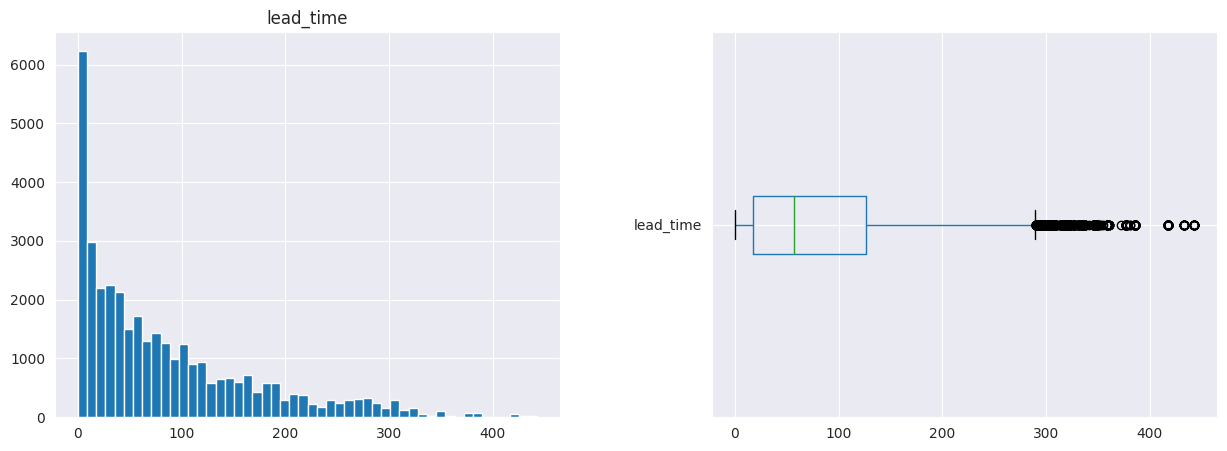

In [ ]:
#xử lý ngoại lệ thuộc tính lead_time
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
df[["lead_time"]].hist(bins=50, ax=axes[0]);
df[["lead_time"]].boxplot(ax=axes[1], vert=False);

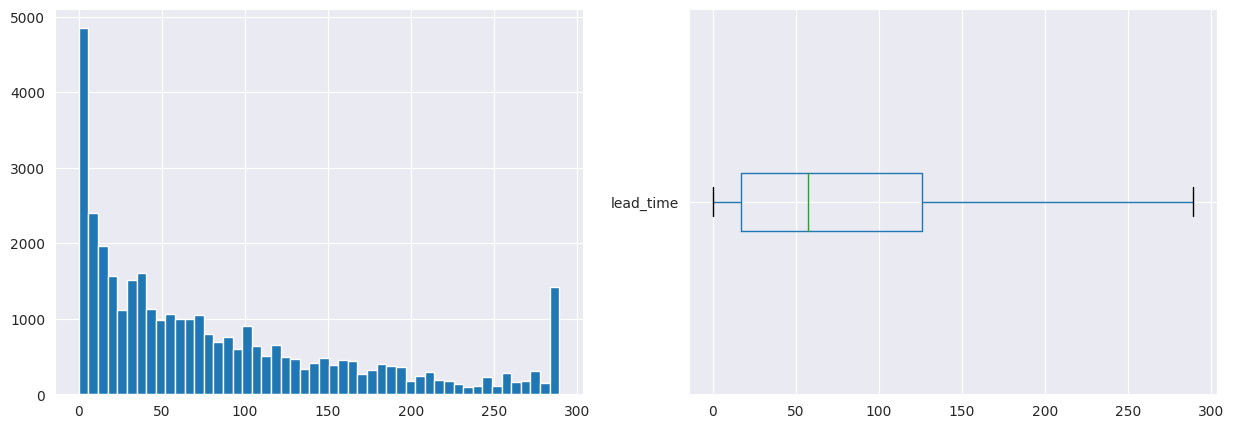

In [ ]:
clipped_total_rooms = BoxplotOutlierClipper().fit_transform(df["lead_time"])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
clipped_total_rooms.hist(bins=50, ax=axes[0])
clipped_total_rooms.to_frame().boxplot(ax=axes[1], vert=False);

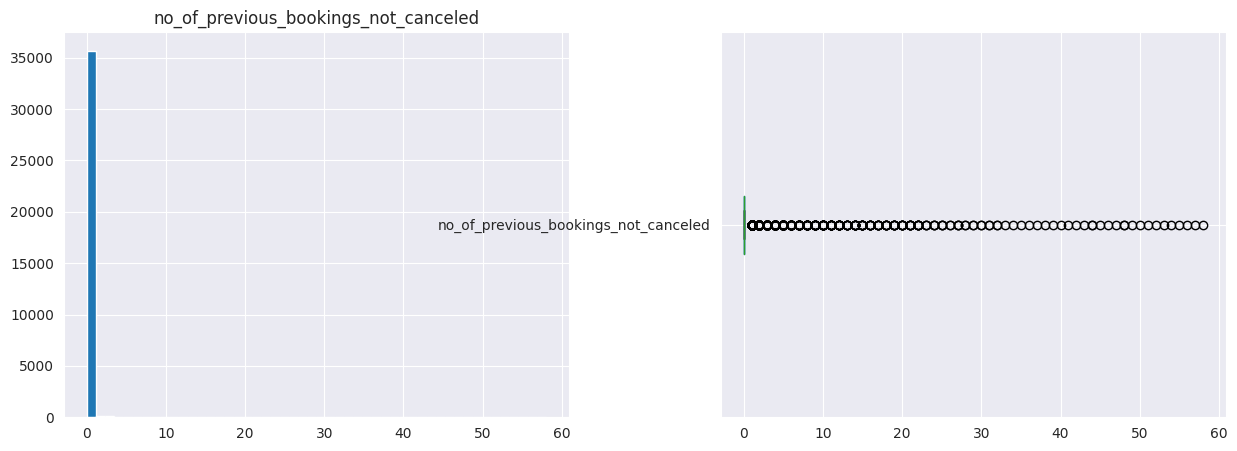

In [ ]:
#xử lý ngoại lệ thuộc tính no_of_previous_bookings_not_canceled
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
df[["no_of_previous_bookings_not_canceled"]].hist(bins=50, ax=axes[0]);
df[["no_of_previous_bookings_not_canceled"]].boxplot(ax=axes[1], vert=False);

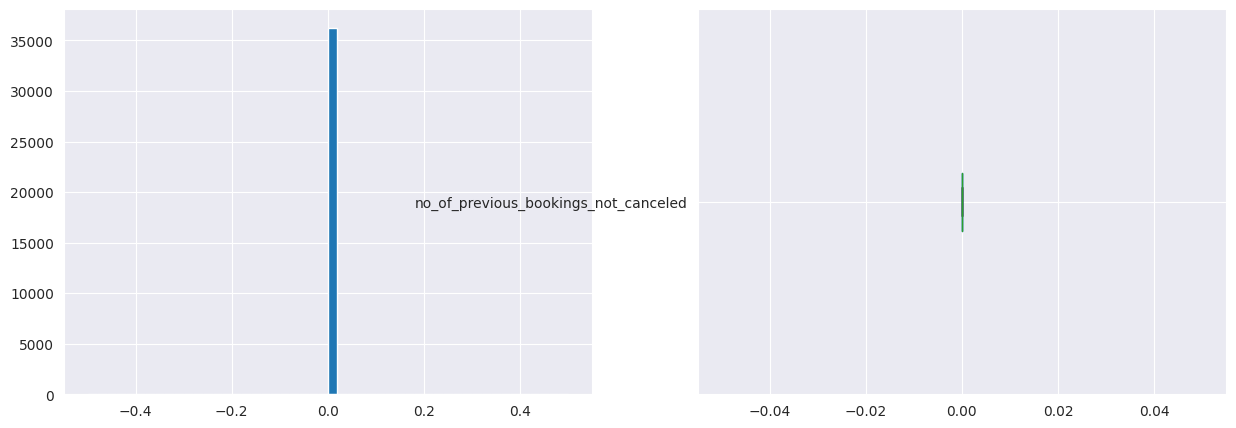

In [ ]:
clipped_total_rooms = BoxplotOutlierClipper().fit_transform(df["no_of_previous_bookings_not_canceled"])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
clipped_total_rooms.hist(bins=50, ax=axes[0])
clipped_total_rooms.to_frame().boxplot(ax=axes[1], vert=False);

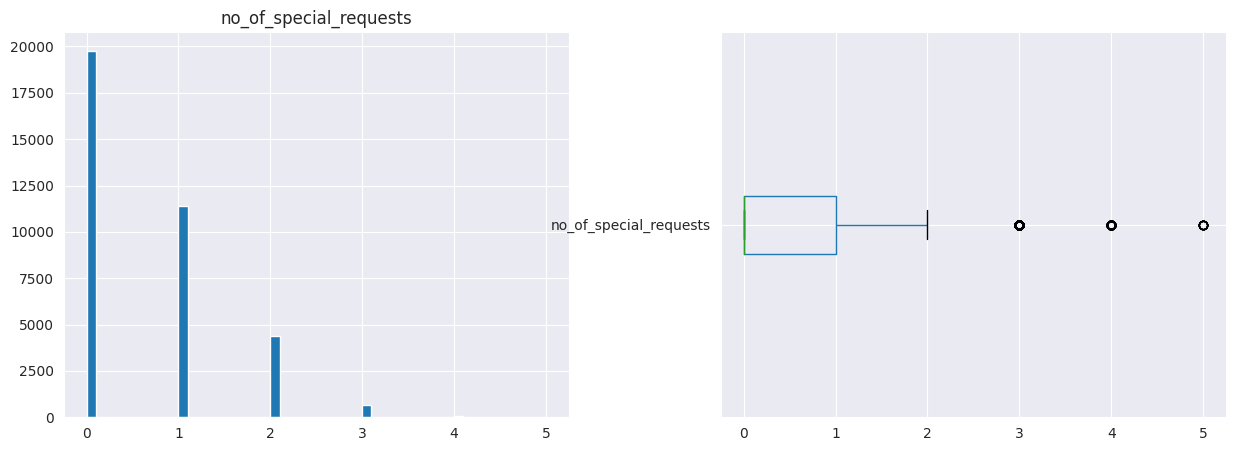

In [ ]:
#xử lý ngoại lệ thuộc tính 'no_of_special_requests'
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
df[["no_of_special_requests"]].hist(bins=50, ax=axes[0]);
df[["no_of_special_requests"]].boxplot(ax=axes[1], vert=False);

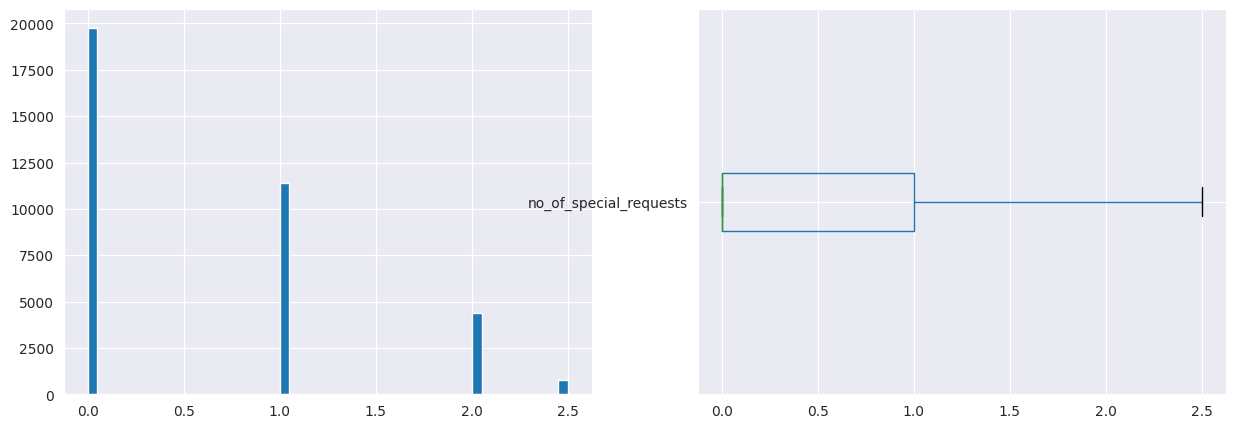

In [ ]:
clipped_total_rooms = BoxplotOutlierClipper().fit_transform(df["no_of_special_requests"])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
clipped_total_rooms.hist(bins=50, ax=axes[0])
clipped_total_rooms.to_frame().boxplot(ax=axes[1], vert=False);

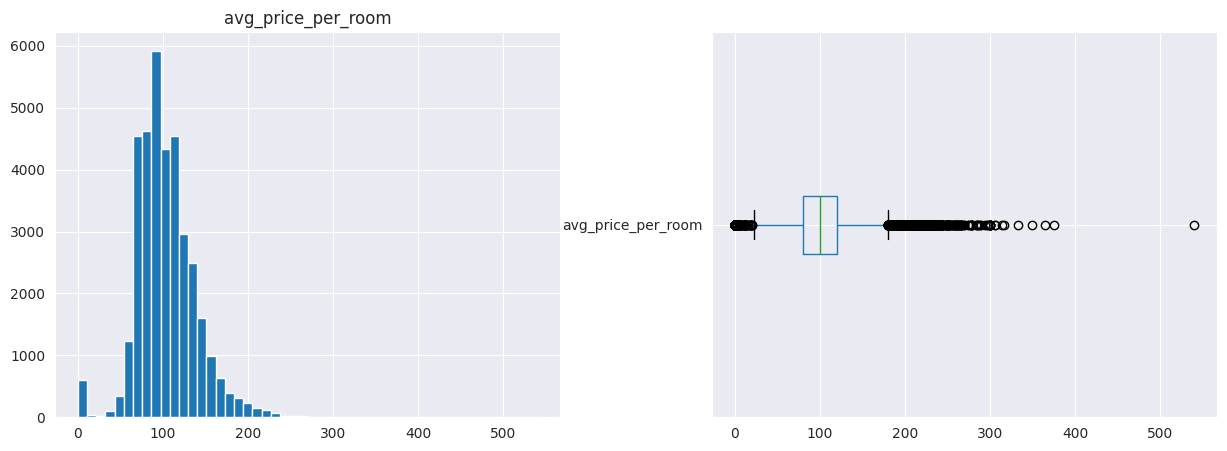

In [ ]:
#xử lý ngoại lệ thuộc tính 'avg_price_per_room'
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
df[["avg_price_per_room"]].hist(bins=50, ax=axes[0]);
df[["avg_price_per_room"]].boxplot(ax=axes[1], vert=False);

In [ ]:
from typing import Tuple
from sklearn.base import BaseEstimator, TransformerMixin


def find_boxplot_boundaries(
    col: pd.Series, whisker_coeff: float = 1.5
) -> Tuple[float, float]:
    """Findx minimum and maximum in boxplot.

    Args:
        col: a pandas serires of input.
        whisker_coeff: whisker coefficient in box plot
    """
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - whisker_coeff * IQR
    upper = Q3 + whisker_coeff * IQR
    return lower, upper


class BoxplotOutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self, whisker_coeff: float = 1.5):
        self.whisker = whisker_coeff
        self.lower = None
        self.upper = None

    def fit(self, X: pd.Series):
        self.lower, self.upper = find_boxplot_boundaries(X, self.whisker)
        return self

    def transform(self, X):
        return X.clip(self.lower, self.upper)

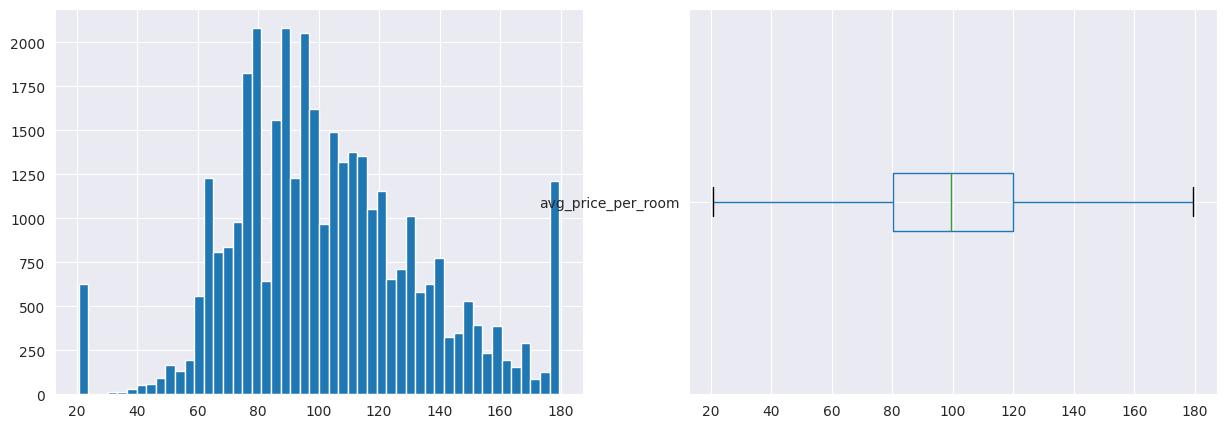

In [ ]:
clipped_total_rooms = BoxplotOutlierClipper().fit_transform(df["avg_price_per_room"])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
clipped_total_rooms.hist(bins=50, ax=axes[0])
clipped_total_rooms.to_frame().boxplot(ax=axes[1], vert=False);

In [ ]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


Tổng số tính năng ngoại trừ mục tiêu: 18
Số lượng tính năng phân loại (<25 Giá trị duy nhất): 13
Số lượng các tính năng liên tục: 5


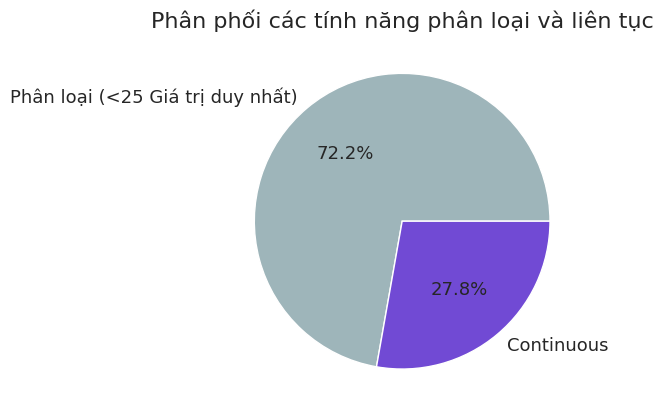

In [ ]:
#EDA
#EDA
#Phân phối dữ liệu liên tục và phân loại
TARGET = 'booking_status'
FEATURES = [col for col in df.columns if col not in ['df', TARGET]]

cat_features = [col for col in FEATURES if df[col].nunique() < 25]
cont_features = [col for col in FEATURES if df[col].nunique() >= 25]

num_cat_features = len(cat_features)
num_cont_features = len(cont_features)

print(f"Tổng số tính năng ngoại trừ mục tiêu: {len(FEATURES)}")
print(f"\033[92mSố lượng tính năng phân loại (<25 Giá trị duy nhất): {num_cat_features}")
print(f"\033[96mSố lượng các tính năng liên tục: {num_cont_features}")

# Define labels and colors for the pie chart
labels = ['Phân loại (<25 Giá trị duy nhất)', 'Continuous']
colors = ['#9eb5ba', '#714ad4']

plt.pie([num_cat_features, num_cont_features], 
        labels=labels,
        colors=colors,
        textprops={'fontsize': 13},
        autopct='%1.1f%%')

# Add a title to the plot
plt.title('Phân phối các tính năng phân loại và liên tục', fontsize=16)

# Show the plot
plt.show()

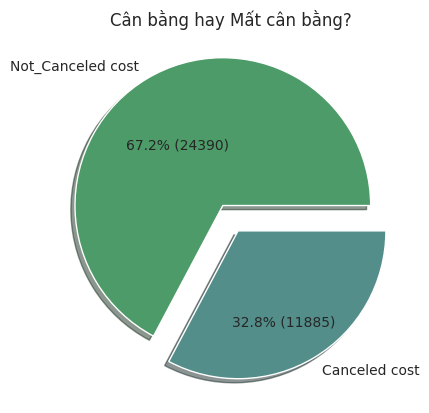

In [ ]:
# Đếm số lần xuất hiện của từng giá trị trong cột 'booking_status'
value_counts = df['booking_status'].value_counts()

# Xác định các chuỗi nhãn bằng f-strings
label = [f'{"Not_Canceled" if i==0 else "Canceled" } cost' for i in range(len(value_counts))]

# Xác định màu sắc 
colors = ['#4d9b68', '#538e8a', '#468e71', '#59ae8c']

# Tạo biểu đồ hình tròn với các giá trị phần trăm được định dạng bằng dấu % và tách các lát
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(value_counts.values, autopct='%0.1f%%', explode=[0.1, 0.1], shadow=True, labels=label, colors=colors)

# Thêm số lượng theo tỷ lệ phần trăm
for i, autotext in enumerate(autotexts):
    count = value_counts[i]
    autotext.set_text(f'{autotext.get_text()} ({count})')
    autotext.set_y(autotext.get_position()[1]-0.1)

# Set the title of the pie chart
ax.set_title('Cân bằng hay Mất cân bằng?')

# Show the pie chart
plt.show()

In [ ]:
pr = df.groupby(['booking_status'])
target = pr.describe(percentiles = [0.25, 0.5, 0.75])[numerical_columns]
target.style.background_gradient(cmap='Greens')


2    26108
1     7695
3     2317
0      139
4       16
Name: no_of_adults, dtype: int64


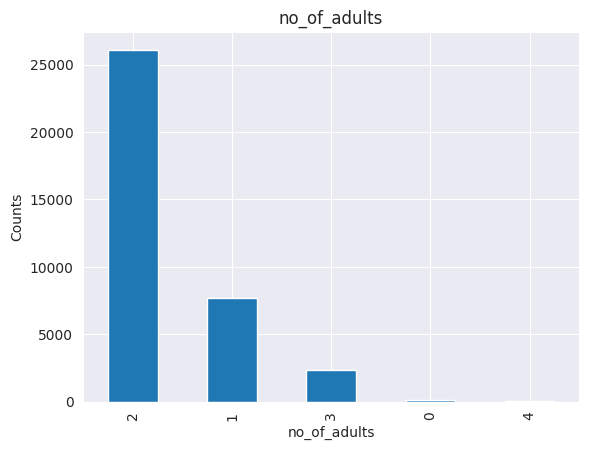

In [ ]:
# Number of Adults
print(f'\033[92m')
print(df['no_of_adults'].value_counts())
ax1 = df['no_of_adults'].value_counts() \
    .plot(kind="bar", title="no_of_adults")
ax1.set_xlabel("no_of_adults")
ax1.set_ylabel("Counts")
plt.show()


0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64


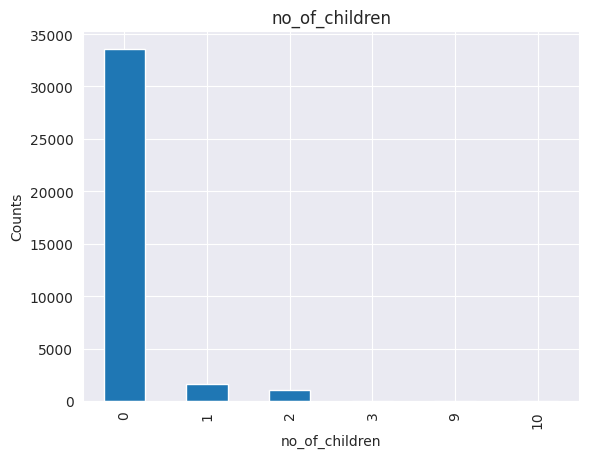

In [ ]:
# no_of_children	
print(f'\033[92m')
print(df['no_of_children'].value_counts())
ax1 = df['no_of_children'].value_counts() \
    .plot(kind="bar", title="no_of_children")
ax1.set_xlabel("no_of_children")
ax1.set_ylabel("Counts")
plt.show()


0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: no_of_weekend_nights, dtype: int64


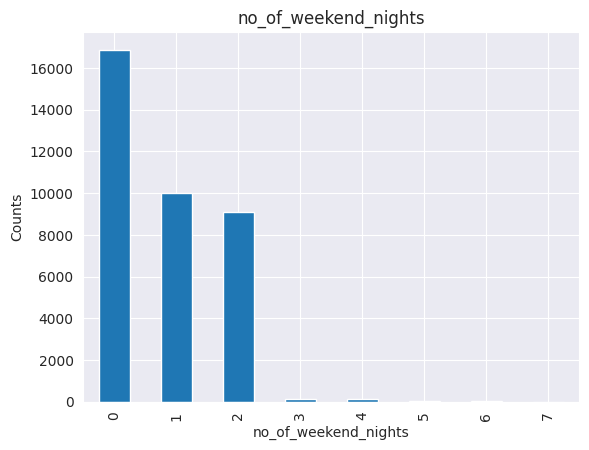

In [ ]:
# no_of_weekend_nights	
print(f'\033[92m')
print(df['no_of_weekend_nights'].value_counts())
ax1 = df['no_of_weekend_nights'].value_counts() \
    .plot(kind="bar", title="no_of_weekend_nights")
ax1.set_xlabel("no_of_weekend_nights")
ax1.set_ylabel("Counts")
plt.show()


2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: no_of_week_nights, dtype: int64


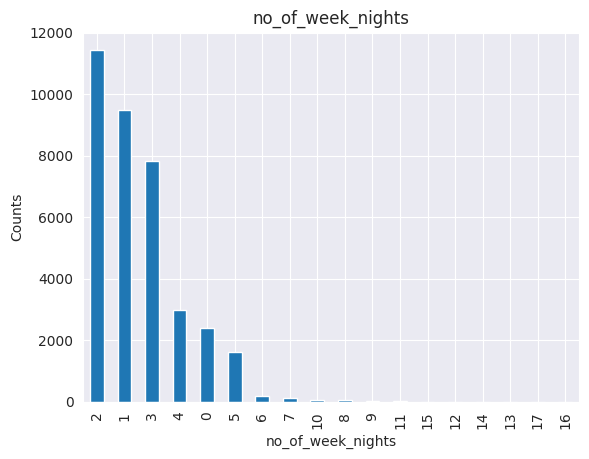

In [ ]:
# no_of_week_nights	
print(f'\033[92m')
print(df['no_of_week_nights'].value_counts())
ax1 = df['no_of_week_nights'].value_counts() \
    .plot(kind="bar", title="no_of_week_nights")
ax1.set_xlabel("no_of_week_nights")
ax1.set_ylabel("Counts")
plt.show()


Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64


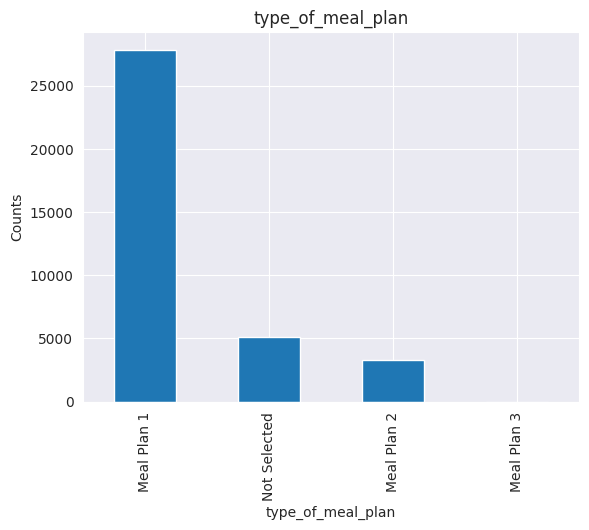

In [ ]:
# type_of_meal_plan
print(f'\033[92m')
print(df['type_of_meal_plan'].value_counts())
ax1 = df['type_of_meal_plan'].value_counts() \
    .plot(kind="bar", title="type_of_meal_plan")
ax1.set_xlabel("type_of_meal_plan")
ax1.set_ylabel("Counts")
plt.show()


0    35151
1     1124
Name: required_car_parking_space, dtype: int64


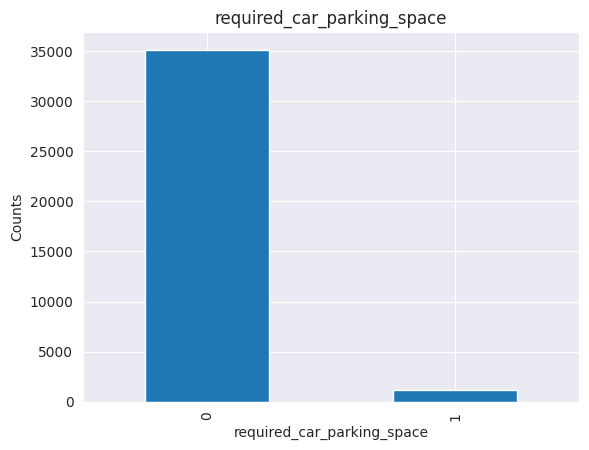

In [ ]:
# required_car_parking_space
print(f'\033[92m')
print(df['required_car_parking_space'].value_counts())
ax1 = df['required_car_parking_space'].value_counts() \
    .plot(kind="bar", title="required_car_parking_space")
ax1.set_xlabel("required_car_parking_space")
ax1.set_ylabel("Counts")
plt.show()


Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64


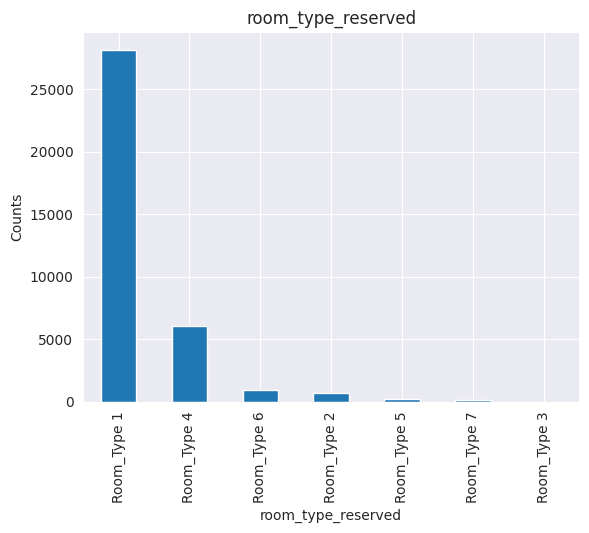

In [ ]:
# room_type_reserved
print(f'\033[92m')
print(df['room_type_reserved'].value_counts())
ax1 = df['room_type_reserved'].value_counts() \
    .plot(kind="bar", title="room_type_reserved")
ax1.set_xlabel("room_type_reserved")
ax1.set_ylabel("Counts")
plt.show()


0      1297
1      1078
2       643
3       630
4       628
       ... 
300       1
353       1
328       1
352       1
351       1
Name: lead_time, Length: 352, dtype: int64


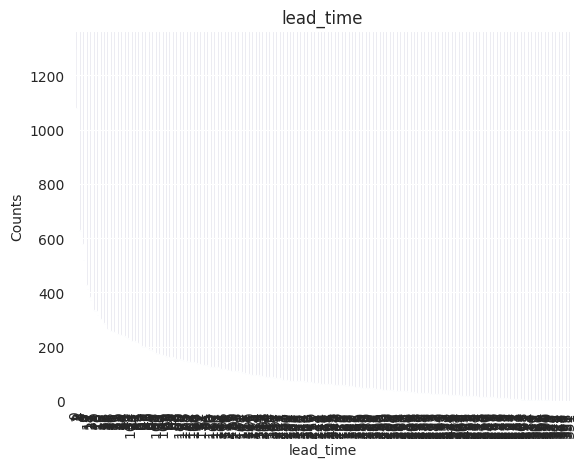

In [ ]:
#lead_time
print(f'\033[92m')
print(df['lead_time'].value_counts())
ax1 = df['lead_time'].value_counts() \
    .plot(kind="bar", title="lead_time")
ax1.set_xlabel("lead_time")
ax1.set_ylabel("Counts")
plt.show()


2018    29761
2017     6514
Name: arrival_year, dtype: int64


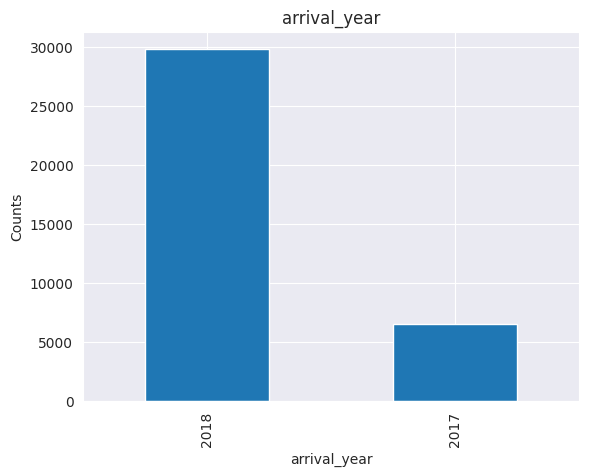

In [ ]:
#arrival_year
print(f'\033[92m')
print(df['arrival_year'].value_counts())
ax1 = df['arrival_year'].value_counts() \
    .plot(kind="bar", title="arrival_year")
ax1.set_xlabel("arrival_year")
ax1.set_ylabel("Counts")
plt.show()


10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: arrival_month, dtype: int64


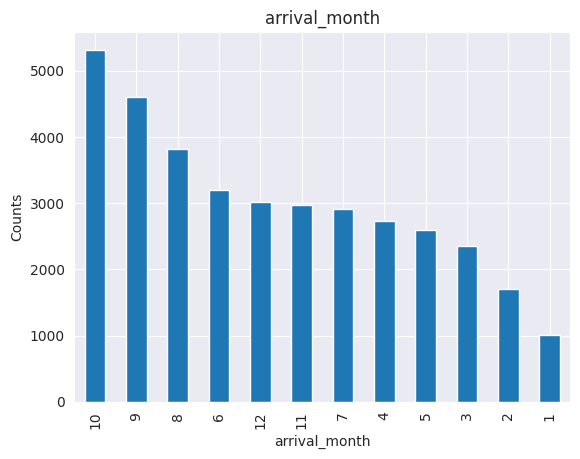

In [ ]:
#arrival_month
print(f'\033[92m')
print(df['arrival_month'].value_counts())
ax1 = df['arrival_month'].value_counts() \
    .plot(kind="bar", title="arrival_month")
ax1.set_xlabel("arrival_month")
ax1.set_ylabel("Counts")
plt.show()


13    1358
17    1345
2     1331
4     1327
19    1327
16    1306
20    1281
15    1273
6     1273
18    1260
14    1242
30    1216
12    1204
8     1198
29    1190
21    1158
5     1154
26    1146
25    1146
1     1133
9     1130
28    1129
7     1110
24    1103
11    1098
3     1098
10    1089
27    1059
22    1023
23     990
31     578
Name: arrival_date, dtype: int64


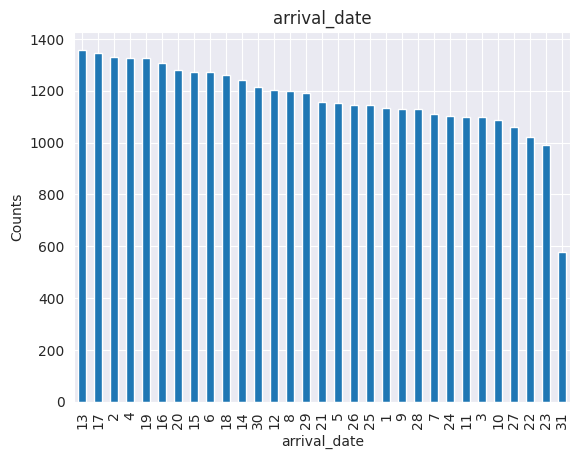

In [ ]:
#arrival_date
print(f'\033[92m')
print(df['arrival_date'].value_counts())
ax1 = df['arrival_date'].value_counts() \
    .plot(kind="bar", title="arrival_date")
ax1.set_xlabel("arrival_date")
ax1.set_ylabel("Counts")
plt.show()


Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64


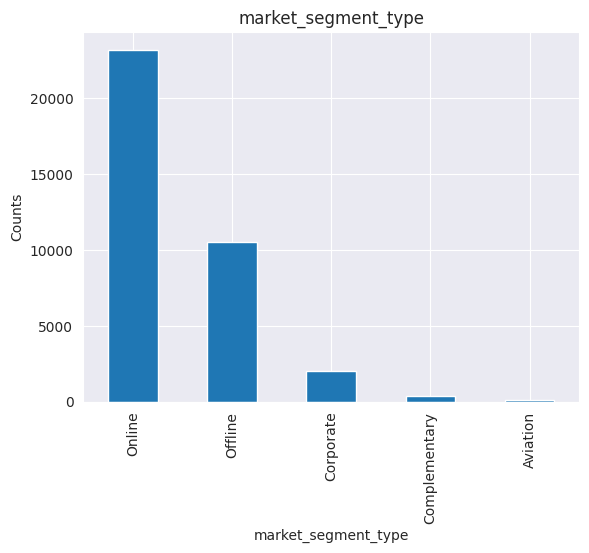

In [ ]:
#market_segment_type
print(f'\033[92m')
print(df['market_segment_type'].value_counts())
ax1 = df['market_segment_type'].value_counts() \
    .plot(kind="bar", title="market_segment_type")
ax1.set_xlabel("market_segment_type")
ax1.set_ylabel("Counts")
plt.show()


0    35345
1      930
Name: repeated_guest, dtype: int64


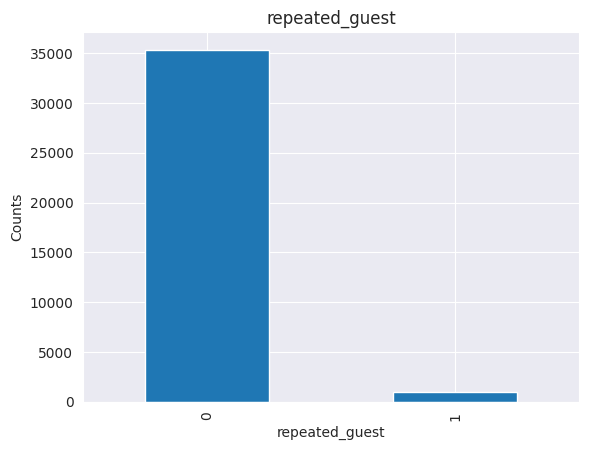

In [ ]:
#repeated_guest
print(f'\033[92m')
print(df['repeated_guest'].value_counts())
ax1 = df['repeated_guest'].value_counts() \
    .plot(kind="bar", title="repeated_guest")
ax1.set_xlabel("repeated_guest")
ax1.set_ylabel("Counts")
plt.show()


0     35937
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: no_of_previous_cancellations, dtype: int64


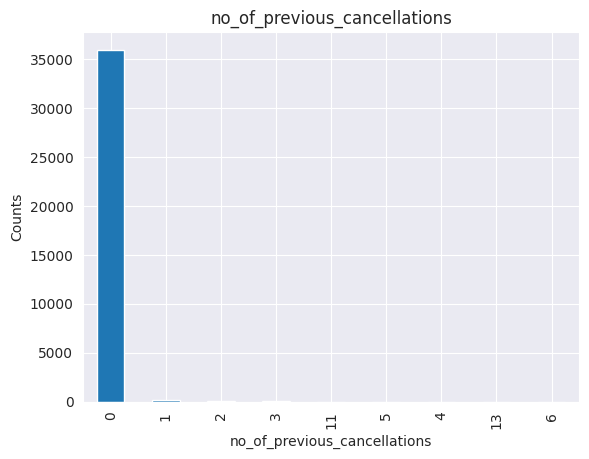

In [ ]:
#no_of_previous_cancellations
print(f'\033[92m')
print(df['no_of_previous_cancellations'].value_counts())
ax1 = df['no_of_previous_cancellations'].value_counts() \
    .plot(kind="bar", title="no_of_previous_cancellations")
ax1.set_xlabel("no_of_previous_cancellations")
ax1.set_ylabel("Counts")
plt.show()


0     35463
1       228
2       112
3        80
4        65
5        60
6        36
7        24
8        23
10       19
9        19
11       15
12       12
14        9
15        8
16        7
13        7
18        6
20        6
21        6
17        6
19        6
22        6
25        3
27        3
24        3
23        3
44        2
29        2
48        2
28        2
30        2
32        2
31        2
26        2
46        1
55        1
45        1
57        1
53        1
54        1
58        1
41        1
40        1
43        1
35        1
50        1
56        1
33        1
37        1
42        1
51        1
38        1
34        1
39        1
52        1
49        1
47        1
36        1
Name: no_of_previous_bookings_not_canceled, dtype: int64


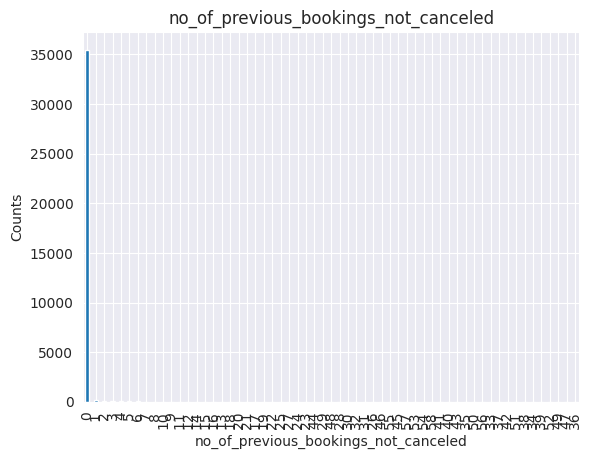

In [ ]:
#no_of_previous_bookings_not_canceled
print(f'\033[92m')
print(df['no_of_previous_bookings_not_canceled'].value_counts())
ax1 = df['no_of_previous_bookings_not_canceled'].value_counts() \
    .plot(kind="bar", title="no_of_previous_bookings_not_canceled")
ax1.set_xlabel("no_of_previous_bookings_not_canceled")
ax1.set_ylabel("Counts")
plt.show()


65.00     848
75.00     826
90.00     703
95.00     669
115.00    662
         ... 
212.42      1
83.48       1
70.42       1
130.99      1
167.80      1
Name: avg_price_per_room, Length: 3930, dtype: int64


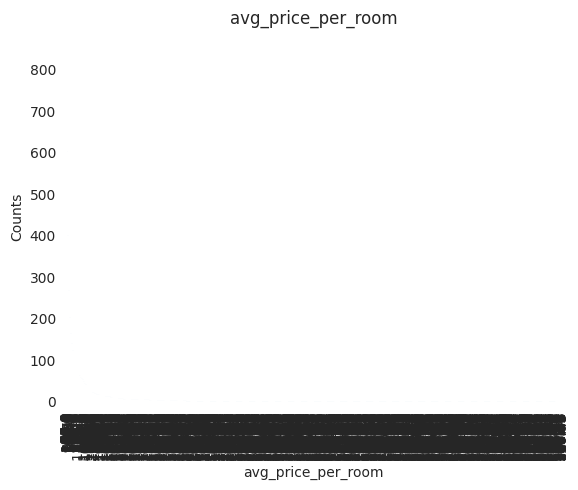

In [ ]:
#avg_price_per_room
print(f'\033[92m')
print(df['avg_price_per_room'].value_counts())
ax1 = df['avg_price_per_room'].value_counts() \
    .plot(kind="bar", title="avg_price_per_room")
ax1.set_xlabel("avg_price_per_room")
ax1.set_ylabel("Counts")
plt.show()


0    19777
1    11373
2     4364
3      675
4       78
5        8
Name: no_of_special_requests, dtype: int64


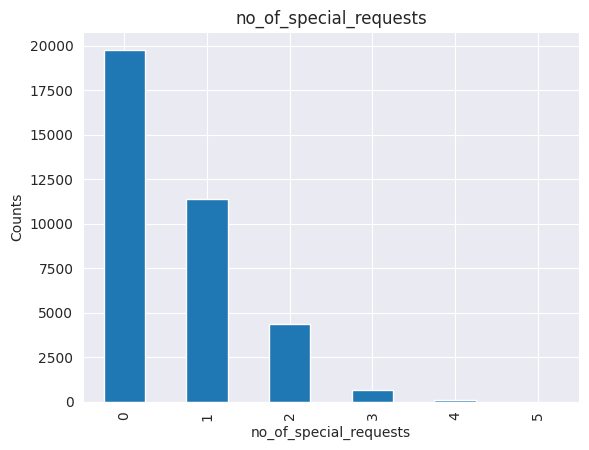

In [ ]:
#no_of_special_requests
print(f'\033[92m')
print(df['no_of_special_requests'].value_counts())
ax1 = df['no_of_special_requests'].value_counts() \
    .plot(kind="bar", title="no_of_special_requests")
ax1.set_xlabel("no_of_special_requests")
ax1.set_ylabel("Counts")
plt.show()


Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64


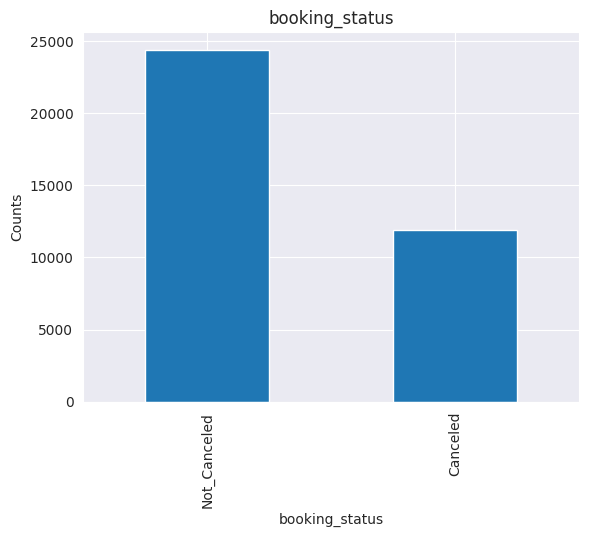

In [ ]:
#booking_status
print(f'\033[92m')
print(df['booking_status'].value_counts())
ax1 = df['booking_status'].value_counts() \
    .plot(kind="bar", title="booking_status")
ax1.set_xlabel("booking_status")
ax1.set_ylabel("Counts")
plt.show()

<Axes: xlabel='booking_status', ylabel='avg_price_per_room'>

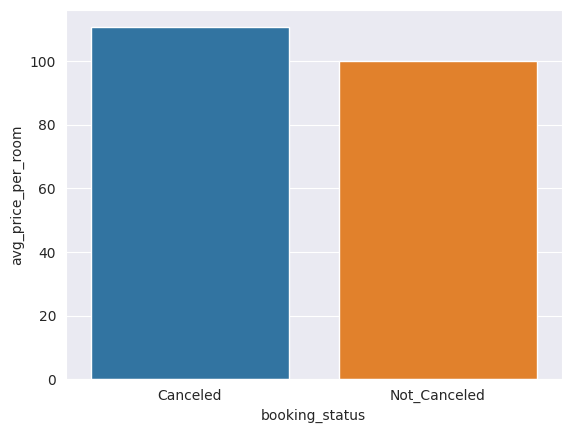

In [ ]:
# phân tích đa biến
average_price_status = df.groupby('booking_status')['avg_price_per_room'].mean().reset_index()
sns.barplot(data=average_price_status, x="booking_status", y="avg_price_per_room")
# => giá cao thì tỉ lệ hủy phòng càng nhiều 

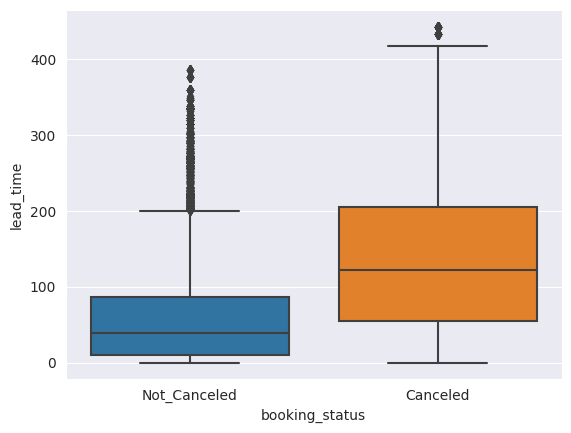

In [ ]:
g = sns.boxplot(df, x='booking_status', y="lead_time")
# => lead_time càng cao thì hủy càng cao 

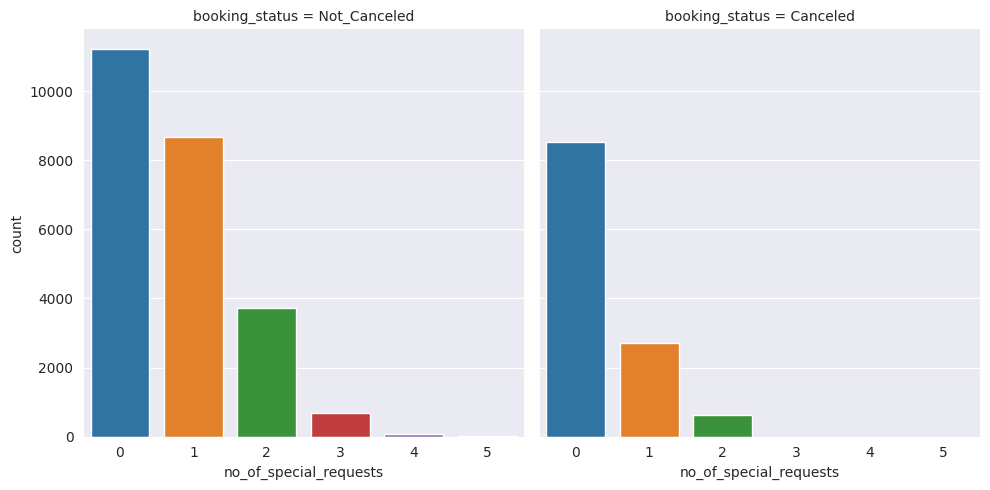

In [ ]:
g = sns.catplot(df, x="no_of_special_requests", col='booking_status', kind='count')
#=> Nếu no_of_special_requests nhiều hơn 2, booking_status sẽ không bị hủy

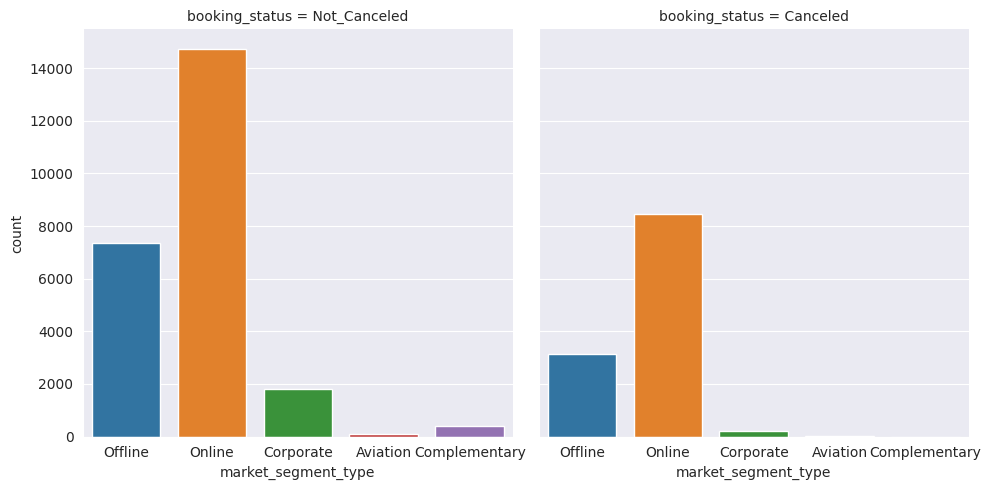

In [ ]:
g = sns.catplot(df, x="market_segment_type", col='booking_status', kind='count')
#=> nếu market_segment_type là Complementary thì sẽ không hủy  

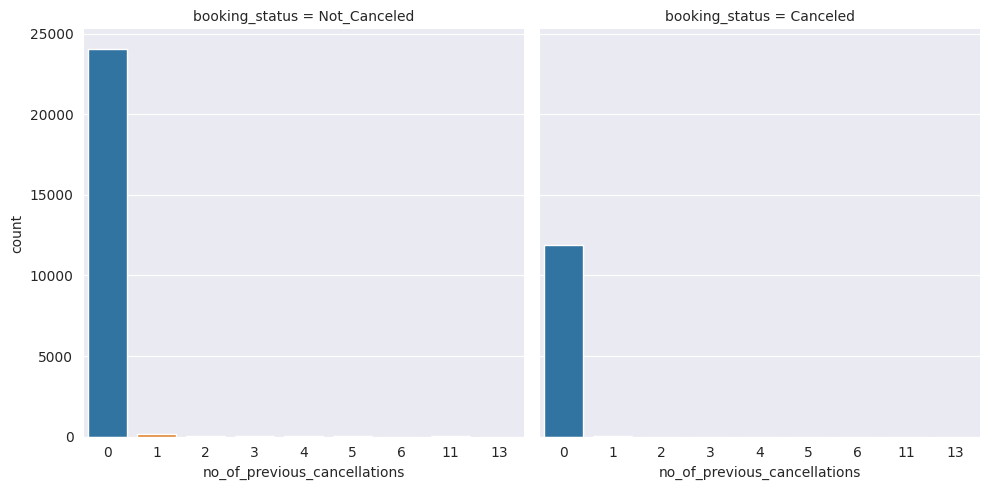

In [ ]:
g = sns.catplot(df, x="no_of_previous_cancellations", col='booking_status', kind='count')
#=> hầu hết các khách hàng hủy đặt phòng của họ sẽ không có đặt phòng khác trong tương lai

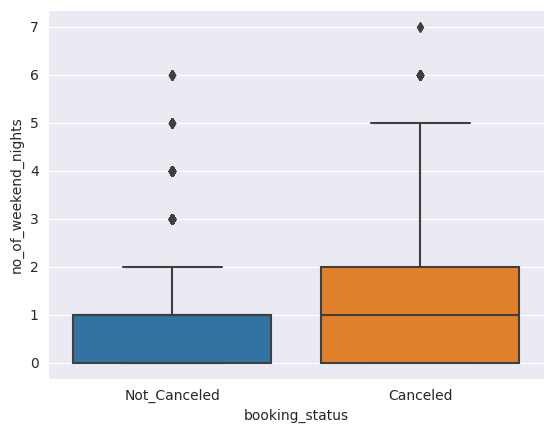

In [ ]:
g = sns.boxplot(df, y="no_of_weekend_nights", x='booking_status')
#=> hầu hết Hủy đặt phòng là từ số lượng Đêm cuối tuần cao

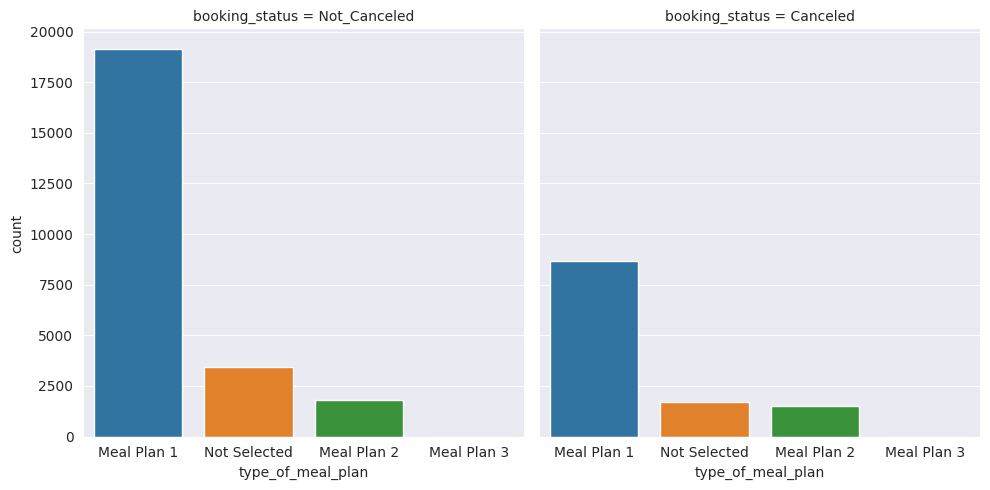

In [ ]:
g = sns.catplot(df, x="type_of_meal_plan", col='booking_status', kind='count')
#=> type_of_meal_plan không ảnh hưởng đến hủy phòng 

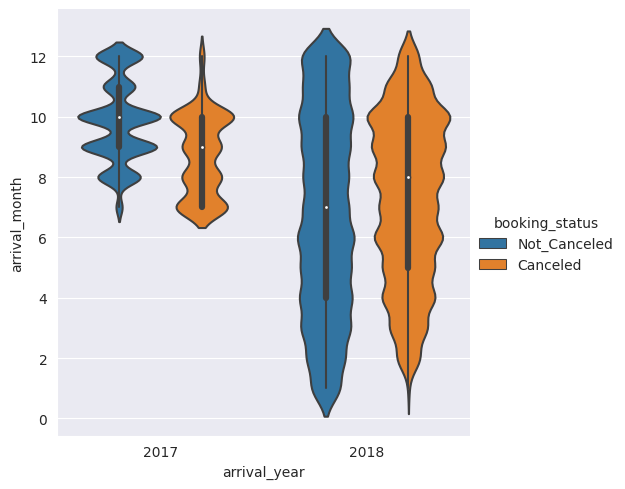

In [ ]:
g = sns.catplot(df, x='arrival_year', y="arrival_month", hue='booking_status', kind='violin')
#=> Tháng 7-8/2017 tỷ lệ hủy cao hơn trong khi đầu năm 2018 tỷ lệ hủy thấp hơn

In [ ]:
# Replace values that say "Not_Canceled" in the "booking_status" column with 0, and values that say "Canceled" with 1
df["booking_status"].replace("Not_Canceled", 0, inplace=True)
df["booking_status"].replace("Canceled", 1, inplace=True)
print("- Replaced values that say 'Not_Canceled' in the 'booking_status' column with 0, and values that say 'Canceled' with 1")

- Replaced values that say 'Not_Canceled' in the 'booking_status' column with 0, and values that say 'Canceled' with 1


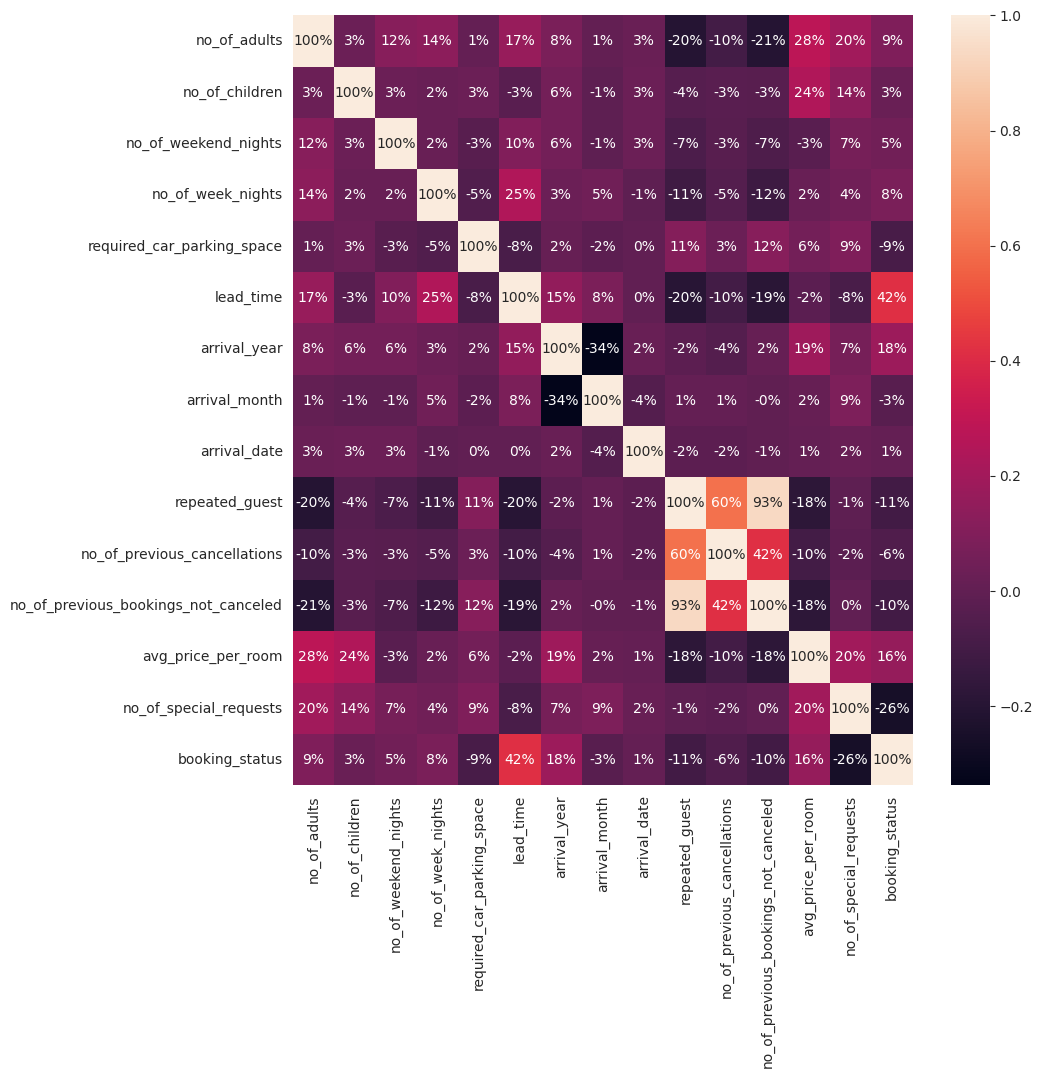

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(method='spearman'), annot=True, fmt='.0%')
plt.show()

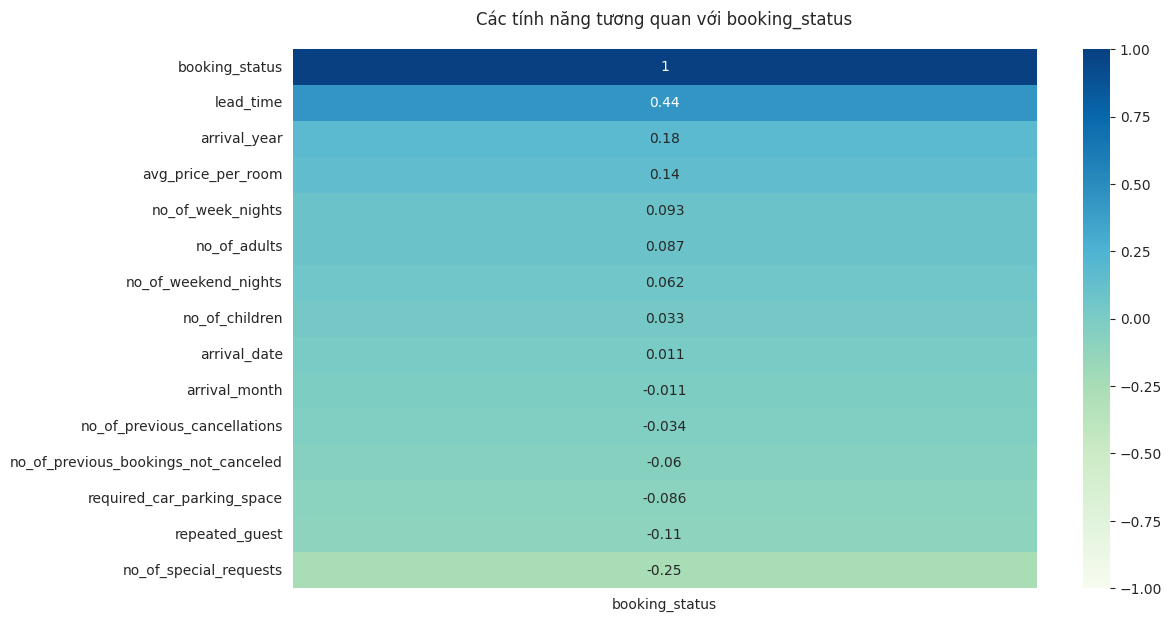

In [ ]:
#tương quan
plt.figure (figsize = (12, 7), dpi = 100)
heatmap = sns.heatmap (df.corr()[['booking_status']].sort_values (by = 'booking_status', ascending = False), vmin = -1, vmax = 1, annot = True, cmap = 'GnBu')
heatmap.set_title ('Các tính năng tương quan với booking_status', fontdict = {'fontsize':12}, pad = 18);

In [ ]:

print("- Replaced values that say 'Not_Canceled' in the 'booking_status' column with 0, and values that say 'Canceled' with 1")

# Replace values that say "Not selected" in the "type_of_meal_plan" column with 0
df["type_of_meal_plan"].replace("Not Selected", 0, inplace=True)
print("- Replaced values that say 'Not selected' in the 'type_of_meal_plan' column with 0")

# Replace values that say "Meal Plan 1" in the "type_of_meal_plan" column with 1
df["type_of_meal_plan"].replace("Meal Plan 1", 1, inplace=True)
print("- Replaced values that say 'Meal Plan 1' in the 'type_of_meal_plan' column with 1")

# Replace values that say "Meal Plan 2" in the "type_of_meal_plan" column with 2
df["type_of_meal_plan"].replace("Meal Plan 2", 2, inplace=True)
print("- Replaced values that say 'Meal Plan 2' in the 'type_of_meal_plan' column with 2")

# Replace values that say "Meal Plan 3" in the "type_of_meal_plan" column with 3
df["type_of_meal_plan"].replace("Meal Plan 3", 3, inplace=True)
print("- Replaced values that say 'Meal Plan 3' in the 'type_of_meal_plan' column with 3")

# Replace values that say "Room_Type 1" in the "room_type_reserved" column with 1
df["room_type_reserved"].replace("Room_Type 1", 1, inplace=True)
print("- Replaced values that say 'Room_Type 1' in the 'room_type_reserved' column with 1")

# Replace values that say "Room_Type 2" in the "room_type_reserved" column with 2
df["room_type_reserved"].replace("Room_Type 2", 2, inplace=True)
print("- Replaced values that say 'Room_Type 2' in the 'room_type_reserved' column with 2")

# Replace values that say "Room_Type 3" in the "room_type_reserved" column with 3
df["room_type_reserved"].replace("Room_Type 3", 3, inplace=True)
print("- Replaced values that say 'Room_Type 3' in the 'room_type_reserved' column with 3")

# Replace values that say "Room_Type 4" in the "room_type_reserved" column with 4
df["room_type_reserved"].replace("Room_Type 4", 4, inplace=True)
print("- Replaced values that say 'Room_Type 4' in the 'room_type_reserved' column with 4")

# Replace values that say "Room_Type 5" in the "room_type_reserved" column with 5
df["room_type_reserved"].replace("Room_Type 5", 5, inplace=True)
print("- Replaced values that say 'Room_Type 5' in the 'room_type_reserved' column with 5")

# Replace values that say "Room_Type 6" in the "room_type_reserved" column with 6
df["room_type_reserved"].replace("Room_Type 6", 6, inplace=True)
print("- Replaced values that say 'Room_Type 6' in the 'room_type_reserved' column with 6")

# Replace values that say "Room_Type 7" in the "room_type_reserved" column with 7
df["room_type_reserved"].replace("Room_Type 7", 7, inplace=True)
print("- Replaced values that say 'Room_Type 7' in the 'room_type_reserved' column with 7")

# Replace values that say "Offline" in the "market_segment_type" column with 0
df["market_segment_type"].replace("Offline", 0, inplace=True)
print("- Replaced values that say 'Offline' in the 'market_segment_type' column with 0")
# Replace values that say "Online" in the "market_segment_type column with 1
df["market_segment_type"].replace("Online", 1, inplace=True)
print("- Replaced values that say 'Online' in the 'market_segment_type' column with 1")
# Replace values that say "Corporate" in the "market_segment_type" column with 2
df["market_segment_type"].replace("Corporate", 2, inplace=True)
print("- Replaced values that say 'Corporate' in the 'market_segment_type' column with 2")
# Replace values that say "Aviation" in the "market_segment_type" column with 3
df["market_segment_type"].replace("Aviation", 3, inplace=True)
print("- Replaced values that say 'Aviation' in the 'market_segment_type' column with 3")
# Replace values that say "Complementary" in the "market_segment_type" column with 3
df["market_segment_type"].replace("Complementary", 4, inplace=True)
print("- Replaced values that say 'Complementary' in the 'market_segment_type' column with 4")

#Hiển thị số lượng cột số và không phải số trong khung dữ liệu
print("\n[POST CONVERSION]\n Number of numerical columns: {}".format(df.select_dtypes(include=np.number).shape[1]))
print("\n[POST CONVERSION]\n Number of non-numerical columns: {}".format(df.select_dtypes(exclude=np.number).shape[1]))

- Replaced values that say 'Not_Canceled' in the 'booking_status' column with 0, and values that say 'Canceled' with 1
- Replaced values that say 'Not selected' in the 'type_of_meal_plan' column with 0
- Replaced values that say 'Meal Plan 1' in the 'type_of_meal_plan' column with 1
- Replaced values that say 'Meal Plan 2' in the 'type_of_meal_plan' column with 2
- Replaced values that say 'Meal Plan 3' in the 'type_of_meal_plan' column with 3
- Replaced values that say 'Room_Type 1' in the 'room_type_reserved' column with 1
- Replaced values that say 'Room_Type 2' in the 'room_type_reserved' column with 2
- Replaced values that say 'Room_Type 3' in the 'room_type_reserved' column with 3
- Replaced values that say 'Room_Type 4' in the 'room_type_reserved' column with 4
- Replaced values that say 'Room_Type 5' in the 'room_type_reserved' column with 5
- Replaced values that say 'Room_Type 6' in the 'room_type_reserved' column with 6
- Replaced values that say 'Room_Type 7' in the 'room_

In [ ]:
# Thuật toán Cây quyết định
# tạo bản sao
df_tree = df.copy()

In [ ]:
df_tree.drop("Booking_ID", axis=1, inplace=True)
print("- Dropped 'Booking_ID' column")


- Dropped 'Booking_ID' column


In [ ]:
df_tree.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,1,0,1,224,2017,10,2,0,0,0,0,65.00,0,0
1,2,0,2,3,0,0,1,5,2018,11,6,1,0,0,0,106.68,1,0
2,1,0,2,1,1,0,1,1,2018,2,28,1,0,0,0,60.00,0,1
3,2,0,0,2,1,0,1,211,2018,5,20,1,0,0,0,100.00,0,1
4,2,0,1,1,0,0,1,48,2018,4,11,1,0,0,0,94.50,0,1


In [ ]:
# chuyển sang kiểu str
df_tree['required_car_parking_space'] = df_tree['required_car_parking_space'].astype(str)
df_tree['arrival_month'] = df_tree['arrival_month'].astype(str)
df_tree['repeated_guest'] = df_tree['repeated_guest'].astype(str)
df_tree['no_of_previous_cancellations'] = df_tree['no_of_previous_cancellations'].astype(str)
df_tree['no_of_previous_bookings_not_canceled'] = df_tree['no_of_previous_bookings_not_canceled'].astype(str)
df_tree['no_of_special_requests'] = df_tree['no_of_special_requests'].astype(str)
df_tree['booking_status'] = df_tree['booking_status'].astype(str)
df_tree['no_of_adults'] = df_tree['no_of_adults'].astype(str)
df_tree['no_of_children'] = df_tree['no_of_children'].astype(str)
df_tree['no_of_weekend_nights'] = df_tree['no_of_weekend_nights'].astype(str)
df_tree['no_of_week_nights'] = df_tree['no_of_week_nights'].astype(str)
df_tree['type_of_meal_plan'] = df_tree['type_of_meal_plan'].astype(str)
df_tree['room_type_reserved'] = df_tree['room_type_reserved'].astype(str)
df_tree['lead_time'] = df_tree['lead_time'].astype(str)
df_tree['arrival_year'] = df_tree['arrival_year'].astype(str)
df_tree['arrival_date'] = df_tree['arrival_date'].astype(str)
df_tree['market_segment_type'] = df_tree['market_segment_type'].astype(str)
df_tree['avg_price_per_room'] = df_tree['avg_price_per_room'].astype(str)

In [ ]:
#Khai báo vectơ đặc trưng và biến mục tiêu
X = df_tree.drop('booking_status', axis=1)
y = df_tree['booking_status'].values.reshape(-1, 1)

In [ ]:
# Check the shape of X and y
print ('X:', X.shape,'\ny:', y.shape)

X: (36275, 17) 
y: (36275, 1)


In [ ]:
#Tìm kích thước thử nghiệm tốt nhất
# Array of test size value from 0.2 to 0.3
test_size = np.arange(start=0.2, stop=0.35, step= 0.05)

# Khởi tạo danh sách nơi sẽ lưu trữ điểm của từng kích thước bài kiểm tra
score =[]
for size in test_size:
    X_train1, X_test1, y_train1, y_test1 = train_test_split (X, y, test_size=size, random_state=0)
    DT_Clf = DecisionTreeClassifier (max_depth=3)
    DT_Clf.fit (X_train1, y_train1)
    score.append (DT_Clf.score (X_test1, y_test1))

# Tạo một khung dữ liệu để hiển thị kết quả
r= pd.DataFrame({'Test size': test_size , 'Score': score})
r.sort_values(by = ['Score'], ascending = False, inplace = True)
r.style.highlight_max(color='#acd9a8')
# => test size 0.3 có score lớn nhất

,Test size,Score
2,0.300000,0.776808
1,0.250000,0.775830
0,0.200000,0.774638


In [ ]:
#Tách X và y thành các tập huấn luyện và kiểm tra
X_train1, X_test1, y_train1, y_test1 = train_test_split (X, y, stratify=y, test_size = 0.3, random_state = 0)

In [ ]:
# check the shape of X_train, X_test, y_train and y_test
print('X_train shape: ', X_train1.shape)
print('X_test shape: ', X_test1.shape)
print('y_train shape: ', y_train1.shape)
print('y_test shape: ', y_test1.shape)

X_train shape:  (25392, 17)
X_test shape:  (10883, 17)
y_train shape:  (25392, 1)
y_test shape:  (10883, 1)


In [ ]:
#Đào tạo mô hình cây quyết định
# Khởi tạo mô hình
DT_model = DecisionTreeClassifier(max_depth=3)

# Lắp mô hình vào tập huấn luyện
DT_model.fit(X_train1, y_train1)

DecisionTreeClassifier(max_depth=3)

In [ ]:
y_pred = DT_model.predict(X_test1) #Dự đoán thử nghiệm X

In [ ]:
#Kiểm tra điểm chính xác
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test1, y_pred)))

Model accuracy score: 0.7724


In [ ]:
# in điểm trên tập huấn luyện và tập kiểm tra
print('Training set score: {:.4f}'.format(DT_model.score(X_train1, y_train1)))
print('Test set score: {:.4f}'.format(DT_model.score(X_test1, y_test1)))

Training set score: 0.7784
Test set score: 0.7724


In [ ]:
# KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
#Xác thực chéo K-Fold
kf = KFold(n_splits=10, shuffle=False)

In [ ]:
#Độ chính xác xác thực chéo
# Validation
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
# Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, auc, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from statistics import stdev
score = cross_val_score(DT_model, X_train1, y_train1, cv=kf, scoring='accuracy')
DT_model_cv_score = score.mean()
DT_model_cv_stdev = stdev(score)
print('Điểm số Độ chính xác của Xác thực chéo là:\n {}'.format(score))

Điểm số Độ chính xác của Xác thực chéo là:
 [0.77755906 0.78188976 0.76289878 0.77944072 0.78259157 0.77195746
 0.78653013 0.77550217 0.77944072 0.78574242]


In [ ]:
Accuracy  = ['Độ chính xác xác thực chéo']
DT_A = pd.DataFrame({'CV Mean':DT_model_cv_score,'Std':DT_model_cv_stdev},index=Accuracy )
DT_A
#=>Bằng cách sử dụng xác thực chéo trung bình,  có thể kết luận rằng mong đợi mô hình có độ chính xác trung bình khoảng 77,83 %.

,CV Mean,Std
Độ chính xác xác thực chéo,0.778355,0.007014


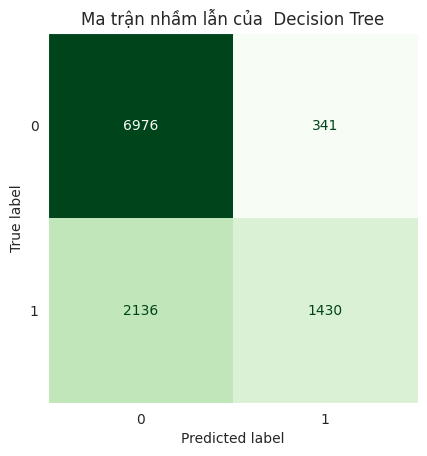

In [ ]:
ConfusionMatrixDisplay.from_estimator(DT_model, X_test1, y_test1, colorbar=False, cmap='Greens')
plt.title('Ma trận nhầm lẫn của  Decision Tree')
plt.grid(False)

In [ ]:
#Báo cáo phân loại
print(classification_report(y_test1, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85      7317
           1       0.81      0.40      0.54      3566

    accuracy                           0.77     10883
   macro avg       0.79      0.68      0.69     10883
weighted avg       0.78      0.77      0.75     10883



In [ ]:
# Số liệu hiệu suất
def metrics_calculator(y_test, y_pred, model_name):
    '''
    Hàm này tính toán tất cả các chỉ số hiệu suất mong muốn cho một mô hình nhất định.
    '''
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='macro'),
                                recall_score(y_test, y_pred, average='macro'),
                                f1_score(y_test, y_pred, average='macro')],
                          index=['Accuracy','Precision','Recall','F1-score'],
                          columns = [model_name])
    return result

In [ ]:

DT_result = metrics_calculator(y_test1, y_pred, 'Decision Tree') #y_pred dự đoán thử nghiệm X
DT_result

,Decision Tree
Accuracy,0.772397
Precision,0.786519
Recall,0.677203
F1-score,0.692556


In [ ]:
feature_names = X.columns
target_names = ["Not_Cancle", "Cancle"]

In [ ]:
# vẽ cây quyết định
#
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import datasets
from IPython.display import Image
from sklearn import model_selection

import pydotplus
#
dot_data = tree.export_graphviz(DT_model, out_file=None,
                                feature_names=feature_names,
                                class_names=target_names)

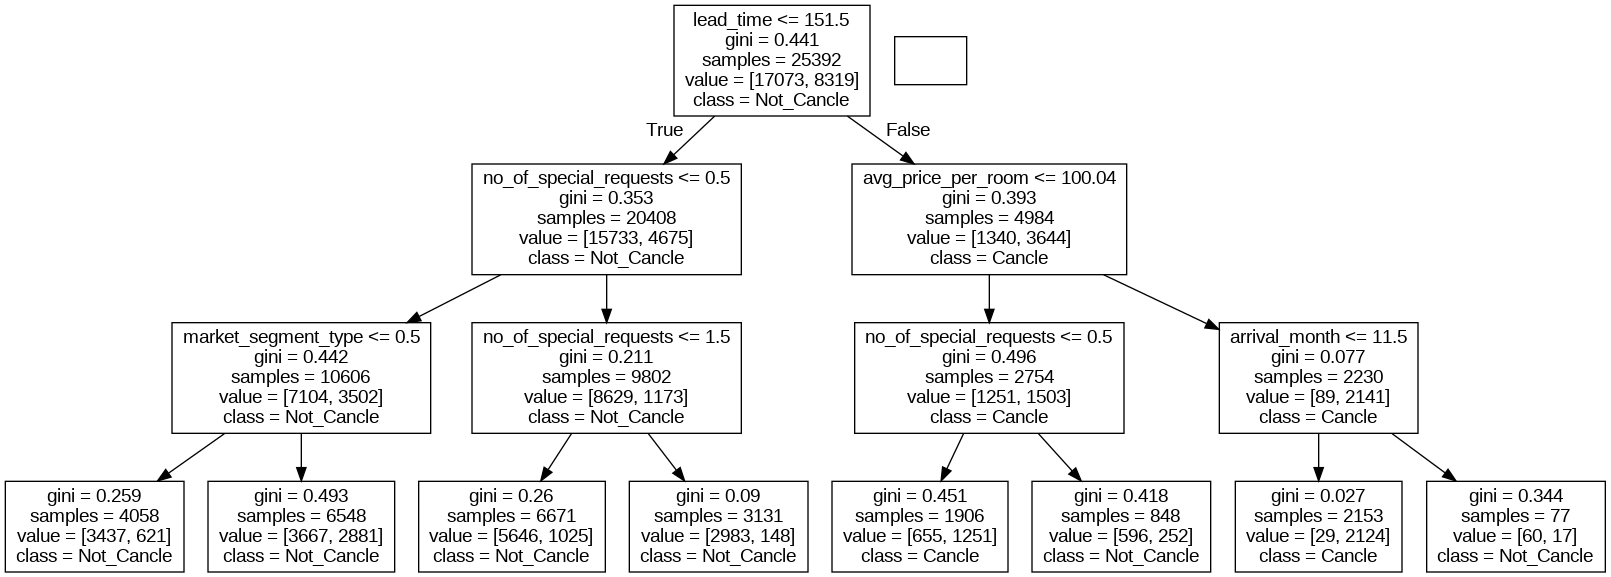

In [ ]:
#
graph = pydotplus.graph_from_dot_data(dot_data)
#
Image(graph.create_png())
# gini = 1-(17073/25392)^2-(8319/25392)^2=0.441
#values =[Not_Cancle, Cancle] => Not_Cancle + Canle = samples: tổng số dl ở nude
# class : nếu Not_Cancle > Cancle -> Not_Cancle.

In [ ]:
#đánh giá mức độ ảnh hưởng của các thuộc tính 
import pandas as pd
#
feature_ipm = pd.Series(DT_model.feature_importances_, index=df_tree.columns.values[0:17]).sort_values(ascending=False)
feature_ipm

lead_time                               0.561971
no_of_special_requests                  0.181214
avg_price_per_room                      0.117738
market_segment_type                     0.114815
arrival_month                           0.024262
no_of_previous_bookings_not_canceled    0.000000
no_of_previous_cancellations            0.000000
repeated_guest                          0.000000
arrival_date                            0.000000
no_of_adults                            0.000000
no_of_children                          0.000000
room_type_reserved                      0.000000
required_car_parking_space              0.000000
type_of_meal_plan                       0.000000
no_of_week_nights                       0.000000
no_of_weekend_nights                    0.000000
arrival_year                            0.000000
dtype: float64

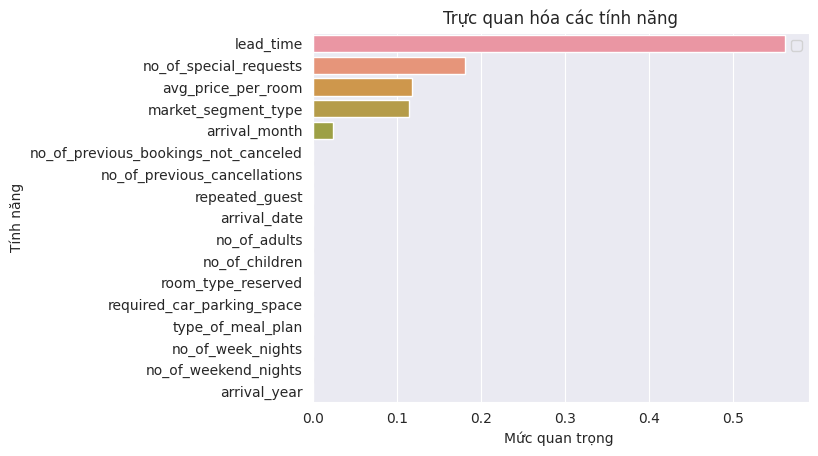

In [ ]:
from ast import increment_lineno
#
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#creating a bar plot
sns.barplot(x=feature_ipm , y=feature_ipm.index)
# thêm nhãn cho biểu đồ 
plt.xlabel('Mức quan trọng ')
plt.ylabel('Tính năng')
plt.title('Trực quan hóa các tính năng')
plt.legend()
plt.show()

In [ ]:
#RandomForest
# tạo bản copy
df_rf = df.copy()

In [ ]:
df_rf.drop("Booking_ID", axis=1, inplace=True)
print("- Dropped 'Booking_ID' column")

- Dropped 'Booking_ID' column


In [ ]:
df_rf.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,1,0,1,224,2017,10,2,0,0,0,0,65.00,0,0
1,2,0,2,3,0,0,1,5,2018,11,6,1,0,0,0,106.68,1,0
2,1,0,2,1,1,0,1,1,2018,2,28,1,0,0,0,60.00,0,1
3,2,0,0,2,1,0,1,211,2018,5,20,1,0,0,0,100.00,0,1
4,2,0,1,1,0,0,1,48,2018,4,11,1,0,0,0,94.50,0,1


In [ ]:
#xây dựng tập huấn luyện, kiểm thử dữ liệu
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X = df_rf.drop('booking_status', axis=1)
y = df_rf['booking_status'].ravel()

In [ ]:
# Array of test size value from 0.2 to 0.3
test_size = np.arange(start=0.2, stop=0.35, step=0.05)

# Khởi tạo danh sách nơi sẽ lưu trữ điểm của từng kích thước bài kiểm tra
score = []
for size in test_size:
    X_train2, X_test2, y_train2, y_test2 = train_test_split (X, y, test_size=size, random_state=0)
    RF_model = RandomForestClassifier ()
    RF_model.fit (X_train2, y_train2)
    score.append (RF_model.score (X_test2, y_test2))
    
# Tạo một khung dữ liệu để hiển thị kết quả   
r= pd.DataFrame({'Test size': test_size, 'Score': score})
r.sort_values(by = ['Score'], ascending = False, inplace = True)
r.style.highlight_max(color='#acd9a8')
# -> test size = 0.2 có score lớn nhất

,Test size,Score
0,0.200000,0.905445
2,0.300000,0.901865
1,0.250000,0.900320


In [ ]:
# Tách X và y thành các tập huấn luyện và kiểm tra
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, stratify=y, test_size = 0.2, random_state = 0)

In [ ]:
# kiểm tra  của X_train, X_test, y_train và y_test
print('X_train shape:', X_train2.shape)
print('X_test shape:', X_test2.shape)
print('y_train shape:', y_train2.shape)
print('y_test shape:', y_test2.shape)

X_train shape: (29020, 17)
X_test shape: (7255, 17)
y_train shape: (29020,)
y_test shape: (7255,)


In [ ]:
# Khởi tạo mô hình
RF_model = RandomForestClassifier()

# Lắp mô hình vào tập huấn luyện
RF_model.fit(X_train2, y_train2)

RandomForestClassifier()

In [ ]:
y_pred = RF_model.predict(X_test2) #y_pred dự đoán thử nghiệm X

In [ ]:
print('Model Accuracy Score: {0:0.4f}'. format(accuracy_score(y_test2, y_pred)))

Model Accuracy Score: 0.9023


In [ ]:
# Scores on training and test set
print('Training set score: {:.4f}'.format(RF_model.score(X_train2, y_train2)))
print('Test set score: {:.4f}'.format(RF_model.score(X_test2, y_test2)))

Training set score: 0.9943
Test set score: 0.9023


In [ ]:
# KFold
kf = KFold(n_splits=10, shuffle=False)

In [ ]:
# độ chính xác của xác thực chéo 
score = cross_val_score(RF_model, X_train2, y_train2, cv=kf, scoring='accuracy')
RF_model_cv_score = score.mean()
RF_model_cv_stdev = stdev(score)
print('Cross Validation Accuracy scores are:\n {}'.format(score))

Cross Validation Accuracy scores are:
 [0.89076499 0.90627154 0.90351482 0.90696072 0.91350793 0.89903515
 0.90179187 0.90006892 0.91247416 0.89834597]


In [ ]:
Accuracy = ['Độ chính xác xác thực chéo']
RF_A = pd.DataFrame({'CV Mean':RF_model_cv_score,'Std':RF_model_cv_stdev},index=Accuracy)
RF_A
#=>Bằng cách sử dụng xác thực chéo trung bình, chúng tôi có thể kết luận rằng chúng tôi mong đợi mô hình có độ chính xác trung bình khoảng 90.03 %.

,CV Mean,Std
Độ chính xác xác thực chéo,0.903274,0.006857


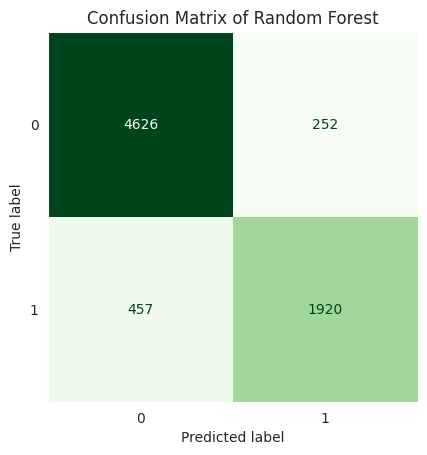

In [ ]:
ConfusionMatrixDisplay.from_estimator(RF_model, X_test2, y_test2, colorbar=False, cmap='Greens')
plt.title('Confusion Matrix of Random Forest')
plt.grid(False)

In [ ]:
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      4878
           1       0.88      0.81      0.84      2377

    accuracy                           0.90      7255
   macro avg       0.90      0.88      0.89      7255
weighted avg       0.90      0.90      0.90      7255



In [ ]:
RF_result = metrics_calculator(y_test2, y_pred, ' Random Forest')
RF_result

,Random Forest
Accuracy,0.902274
Precision,0.897035
Recall,0.878040
F1-score,0.886482


In [ ]:
# chạy thuật toán RF
result = RF_model.predict([[2,0,0,3,1,0,1,37,2018,10,13,0,0,0,0,105,0]])
if result.all() == 0:
  print("Not Cancel")
else:
    print("Cancel")
# => RF đã đúng

Not Cancel


In [ ]:
#SVM Model
df_svm = df.copy()

In [ ]:
df_svm.drop("Booking_ID", axis=1, inplace=True)
print("- Dropped 'Booking_ID' column")

- Dropped 'Booking_ID' column


In [ ]:
X = df_svm.drop('booking_status', axis=1)
y = df_svm['booking_status'].ravel()

In [ ]:
print ('X:', X.shape,'\ny:', y.shape)

X: (36275, 17) 
y: (36275,)


In [ ]:
from sklearn import svm
from sklearn.svm import SVC
#Tìm kích thước thử nghiệm tốt nhất
# Mảng giá trị kích thước thử nghiệm từ 0,2 đến 0,3
test_size = np.arange(start=0.2, stop=0.35, step=0.05)

# Khởi tạo danh sách nơi sẽ lưu trữ điểm của từng kích thước bài kiểm tra
score = []
for size in test_size:
    X_train3, X_test3, y_train3, y_test3 = train_test_split (X, y, test_size=size, random_state=0)
    svm_model = svm.SVC()
    svm_model.fit (X_train3, y_train3)
    score.append (svm_model.score (X_test3, y_test3))
    
# Tạo một khung dữ liệu để hiển thị kết quả 
r= pd.DataFrame({'Test size': test_size, 'Score': score})
r.sort_values(by = ['Score'], ascending = False, inplace = True)
r.style.highlight_max(color='#acd9a8')
#=> chọn test size = 0.25

,Test size,Score
1,0.250000,0.764031
2,0.300000,0.763852
0,0.200000,0.763611


In [ ]:
# Tách X và y thành các tập huấn luyện và kiểm tra
X_train3, X_test3, y_train3, y_test3 = train_test_split (X, y, stratify=y, test_size = 0.25 , random_state = 0)

In [ ]:
# check the shape of X_train, X_test, y_train and y_test
print('X_train shape:', X_train3.shape)
print('X_test shape:', X_test3.shape)
print('y_train shape:', y_train3.shape)
print('y_test shape:', y_test3.shape)

X_train shape: (27206, 17)
X_test shape: (9069, 17)
y_train shape: (27206,)
y_test shape: (9069,)


In [ ]:
# Chia tỷ lệ các tính năng bằng StandardScaler
scaler = StandardScaler()

# Khớp bộ chia tỷ lệ với dữ liệu huấn luyện và biến đổi nó
X_train3 = scaler.fit_transform(X_train3)

# Chuyển đổi dữ liệu thử nghiệm bằng cùng một bộ chia tỷ lệ
X_test3 = scaler.transform(X_test3)

In [ ]:
# Khởi tạo mô hình
svm_model = svm.SVC(probability=True)

#Lắp mô hình vào tập huấn luyện
svm_model.fit(X_train3, y_train3)

SVC(probability=True)

In [ ]:
#Dự đoán thử nghiệm X
y_pred = svm_model.predict(X_test3)

In [ ]:
#Kiểm tra điểm chính xác
print('Điểm chính xác của mô hình: {0:0.4f}'. format(accuracy_score(y_test3, y_pred)))

Điểm chính xác của mô hình: 0.8460


In [ ]:
#Check for Overfitting and Underfitting
print('Training set score: {:.4f}'.format(svm_model.score(X_train3, y_train3)))
print('Test set score: {:.4f}'.format(svm_model.score(X_test3, y_test3)))

Training set score: 0.8508
Test set score: 0.8460


In [ ]:
#Xác thực chéo K-Fold
kf = KFold(n_splits=10, shuffle=False)

In [ ]:
#Độ chính xác xác thực chéo
score = cross_val_score(svm_model, X_train3, y_train3, cv=kf, scoring='accuracy')
svm_model_cv_score = score.mean()
svm_model_cv_stdev = stdev(score)
print('Điểm số Độ chính xác của Xác thực chéo là:\n {}'.format(score))

Điểm số Độ chính xác của Xác thực chéo là:
 [0.83902977 0.85005513 0.8338846  0.83755972 0.84748254 0.83608967
 0.85220588 0.83161765 0.84522059 0.84044118]


In [ ]:
Accuracy = ['Độ chính xác xác thực chéo']
svm_A = pd.DataFrame({'CV Mean':svm_model_cv_score,'Std':svm_model_cv_stdev},index=Accuracy)
svm_A
#=> Bằng cách sử dụng xác thực chéo trung bình, chúng tôi có thể kết luận rằng chúng tôi mong đợi mô hình có độ chính xác trung bình khoảng 84.13 %.

,CV Mean,Std
Độ chính xác xác thực chéo,0.841359,0.007031


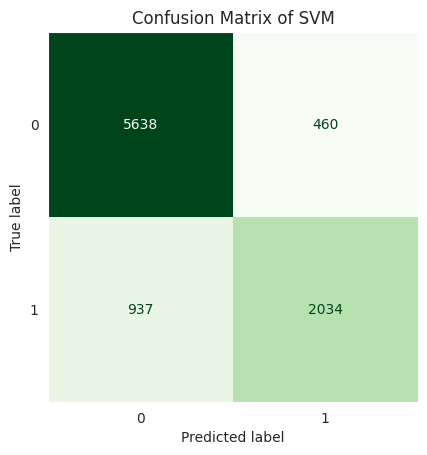

In [ ]:
ConfusionMatrixDisplay.from_estimator(svm_model, X_test3, y_test3, colorbar=False, cmap='Greens')
plt.title('Confusion Matrix of SVM')
plt.grid(False)

In [ ]:
print(classification_report(y_test3, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      6098
           1       0.82      0.68      0.74      2971

    accuracy                           0.85      9069
   macro avg       0.84      0.80      0.82      9069
weighted avg       0.84      0.85      0.84      9069



In [ ]:
#Số liệu hiệu suất
SVM_result = metrics_calculator(y_test3, y_pred, 'SVM')
SVM_result

,SVM
Accuracy,0.845959
Precision,0.836524
Recall,0.804592
F1-score,0.817069


In [ ]:
#Kích thước kiểm tra được sử dụng cho từng Model
#Decision Tree : test size: 0.3
#Random Forest: 0.2
#SVM : 0.25

In [ ]:
#So sánh các chỉ số hiệu suất của các mô hình phân loại
Conclusion = pd.concat([DT_result, RF_result, SVM_result], axis=1)
Conclusion
#Kết luận
# Best Accuracy : Random Forest
# Best Precision: Random Forest
# Best Recall: Random Forest
# Best F1-score : Random Forest

,Decision Tree,Random Forest,SVM
Accuracy,0.772397,0.902274,0.845959
Precision,0.786519,0.897035,0.836524
Recall,0.677203,0.878040,0.804592
F1-score,0.692556,0.886482,0.817069


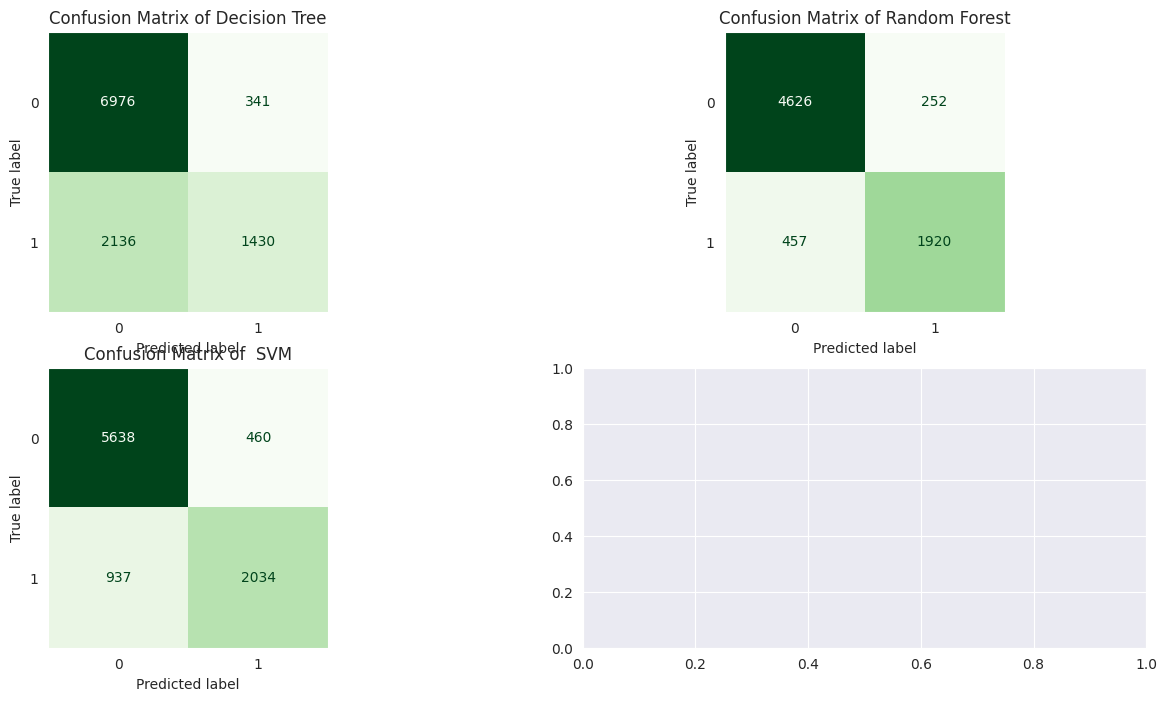

In [ ]:
#Ma trận nhầm lẫn so sánh của các mô hình phân loại khác nhau
# Create subplots with 2 rows and 4 columns
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16,8))
# Vẽ ma trận nhầm lẫn cho  Decision Tree
ax = axs[0,0]
disp = ConfusionMatrixDisplay.from_estimator(DT_model, X_test1, y_test1, colorbar=False, cmap='Greens', ax=ax)
disp.ax_.set_title('Confusion Matrix of Decision Tree')
disp.ax_.grid(False)
# Vẽ ma trận nhầm lẫn cho Random Forest
ax = axs[0, 1]
disp = ConfusionMatrixDisplay.from_estimator(RF_model, X_test2, y_test2, colorbar=False, cmap='Greens', ax=ax)
disp.ax_.set_title('Confusion Matrix of Random Forest')
disp.ax_.grid(False)
# Plot confusion matrix for SVM
ax = axs[1,0]
disp = ConfusionMatrixDisplay.from_estimator(svm_model, X_test3, y_test3, colorbar=False, cmap='Greens', ax=ax)
disp.ax_.set_title('Confusion Matrix of  SVM')
disp.ax_.grid(False)

# KL:
# Label 0 : Decision Tree > SVM > Random Forest
#Label 1: SVM > Random Forest -> Decision Tree

In [ ]:
# tải dữ liệu test
from google.colab import files
uploaded = files.upload()

Saving dataset_test.csv to dataset_test.csv


In [ ]:
import io
df_test = pd.read_csv(io.BytesIO(uploaded['dataset_test.csv'])) # đọc dữ liệu

In [ ]:
# xem dữ liệu test
rows, col = df_test.shape
print ("Kích thước của tập dữ liệu: {}" . format (df_test.shape))
print ('Rows:', rows, '\nColumns:', col)

Kích thước của tập dữ liệu: (120, 18)
Rows: 120 
Columns: 18


In [ ]:
#Bỏ các cột dư thừa
# Drop Id column in test data
df_test.drop(['Booking_ID'], axis=1, inplace=True)
df_test.shape

(120, 17)

In [ ]:
df_test.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0


In [ ]:
unique = df_test.nunique()
unique.to_frame().T

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,4,3,3,6,3,2,5,84,2,12,31,5,2,1,2,90,4


In [ ]:
#chi tiết thống kê
df_test.iloc[:, :-1].describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='Greens')\
                     .bar(subset=["max"], color='#F8766D')\
                     .bar(subset=["mean",], color='#00BFC4')

,count,mean,std,min,25%,50%,75%,max
lead_time,120.000000,83.383333,81.843074,0.000000,29.000000,55.000000,122.000000,443.000000
avg_price_per_room,120.000000,103.015500,31.935246,0.000000,85.022500,99.060000,117.900000,258.000000
arrival_date,120.000000,16.783333,8.961339,1.000000,9.750000,17.000000,25.000000,31.000000
arrival_month,120.000000,7.666667,3.038502,1.000000,5.000000,8.000000,10.000000,12.000000
no_of_week_nights,120.000000,2.200000,1.332212,0.000000,1.000000,2.000000,3.000000,5.000000
no_of_weekend_nights,120.000000,0.791667,0.818852,0.000000,0.000000,1.000000,1.250000,2.000000
no_of_adults,120.000000,1.883333,0.488237,0.000000,2.000000,2.000000,2.000000,3.000000
no_of_previous_bookings_not_canceled,120.000000,0.041667,0.456435,0.000000,0.000000,0.000000,0.000000,5.000000
no_of_children,120.000000,0.100000,0.418079,0.000000,0.000000,0.000000,0.000000,2.000000
arrival_year,120.000000,2017.791667,0.407819,2017.000000,2018.000000,2018.000000,2018.000000,2018.000000


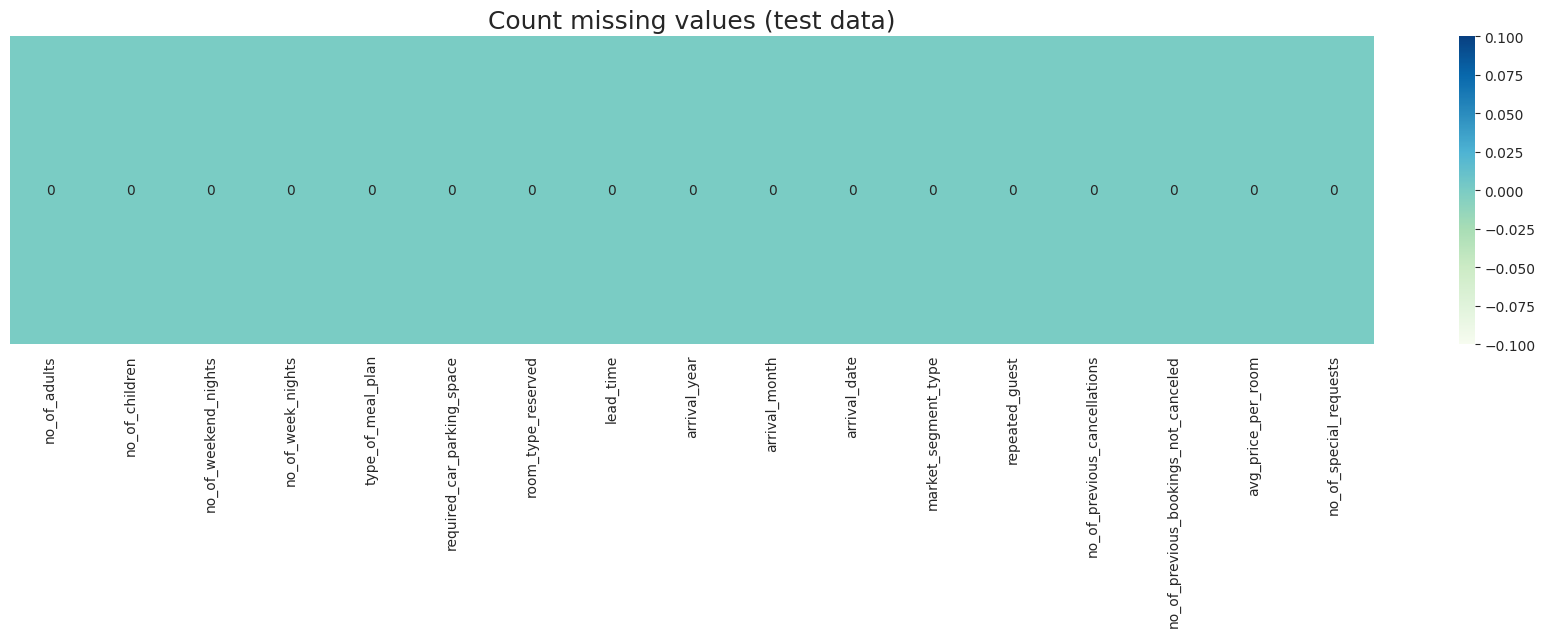

In [ ]:
# Giá trị bị mất(test)
plt.figure(figsize=(22,4))
sns.heatmap((df_test.isna().sum()).to_frame(name='').T,cmap='GnBu', annot=True,
             fmt='0.0f').set_title('Count missing values (test data)', fontsize=18)
plt.show()

In [ ]:
# check trùng lập
# Duplicated data (test)
df_test.duplicated().sum()

1

In [ ]:
# Replace values that say "Not selected" in the "type_of_meal_plan" column with 0
df_test["type_of_meal_plan"].replace("Not Selected", 0, inplace=True)
print("- Replaced values that say 'Not selected' in the 'type_of_meal_plan' column with 0")

# Replace values that say "Meal Plan 1" in the "type_of_meal_plan" column with 1
df_test["type_of_meal_plan"].replace("Meal Plan 1", 1, inplace=True)
print("- Replaced values that say 'Meal Plan 1' in the 'type_of_meal_plan' column with 1")

# Replace values that say "Meal Plan 2" in the "type_of_meal_plan" column with 2
df_test["type_of_meal_plan"].replace("Meal Plan 2", 2, inplace=True)
print("- Replaced values that say 'Meal Plan 2' in the 'type_of_meal_plan' column with 2")

# Replace values that say "Meal Plan 3" in the "type_of_meal_plan" column with 3
df_test["type_of_meal_plan"].replace("Meal Plan 3", 3, inplace=True)
print("- Replaced values that say 'Meal Plan 3' in the 'type_of_meal_plan' column with 3")

# Replace values that say "Room_Type 1" in the "room_type_reserved" column with 1
df_test["room_type_reserved"].replace("Room_Type 1", 1, inplace=True)
print("- Replaced values that say 'Room_Type 1' in the 'room_type_reserved' column with 1")

# Replace values that say "Room_Type 2" in the "room_type_reserved" column with 2
df_test["room_type_reserved"].replace("Room_Type 2", 2, inplace=True)
print("- Replaced values that say 'Room_Type 2' in the 'room_type_reserved' column with 2")

# Replace values that say "Room_Type 3" in the "room_type_reserved" column with 3
df_test["room_type_reserved"].replace("Room_Type 3", 3, inplace=True)
print("- Replaced values that say 'Room_Type 3' in the 'room_type_reserved' column with 3")

# Replace values that say "Room_Type 4" in the "room_type_reserved" column with 4
df_test["room_type_reserved"].replace("Room_Type 4", 4, inplace=True)
print("- Replaced values that say 'Room_Type 4' in the 'room_type_reserved' column with 4")

# Replace values that say "Room_Type 5" in the "room_type_reserved" column with 5
df_test["room_type_reserved"].replace("Room_Type 5", 5, inplace=True)
print("- Replaced values that say 'Room_Type 5' in the 'room_type_reserved' column with 5")

# Replace values that say "Room_Type 6" in the "room_type_reserved" column with 6
df_test["room_type_reserved"].replace("Room_Type 6", 6, inplace=True)
print("- Replaced values that say 'Room_Type 6' in the 'room_type_reserved' column with 6")

# Replace values that say "Room_Type 7" in the "room_type_reserved" column with 7
df_test["room_type_reserved"].replace("Room_Type 7", 7, inplace=True)
print("- Replaced values that say 'Room_Type 7' in the 'room_type_reserved' column with 7")

# Replace values that say "Offline" in the "market_segment_type" column with 0
df_test["market_segment_type"].replace("Offline", 0, inplace=True)
print("- Replaced values that say 'Offline' in the 'market_segment_type' column with 0")
# Replace values that say "Online" in the "market_segment_type column with 1
df_test["market_segment_type"].replace("Online", 1, inplace=True)
print("- Replaced values that say 'Online' in the 'market_segment_type' column with 1")
# Replace values that say "Corporate" in the "market_segment_type" column with 2
df_test["market_segment_type"].replace("Corporate", 2, inplace=True)
print("- Replaced values that say 'Corporate' in the 'market_segment_type' column with 2")
# Replace values that say "Aviation" in the "market_segment_type" column with 3
df_test["market_segment_type"].replace("Aviation", 3, inplace=True)
print("- Replaced values that say 'Aviation' in the 'market_segment_type' column with 4")
# Replace values that say "Complementary" in the "market_segment_type" column with 3
df_test["market_segment_type"].replace("Complementary", 4, inplace=True)
print("- Replaced values that say 'Complementary' in the 'market_segment_type' column with 4")

- Replaced values that say 'Not selected' in the 'type_of_meal_plan' column with 0
- Replaced values that say 'Meal Plan 1' in the 'type_of_meal_plan' column with 1
- Replaced values that say 'Meal Plan 2' in the 'type_of_meal_plan' column with 2
- Replaced values that say 'Meal Plan 3' in the 'type_of_meal_plan' column with 3
- Replaced values that say 'Room_Type 1' in the 'room_type_reserved' column with 1
- Replaced values that say 'Room_Type 2' in the 'room_type_reserved' column with 2
- Replaced values that say 'Room_Type 3' in the 'room_type_reserved' column with 3
- Replaced values that say 'Room_Type 4' in the 'room_type_reserved' column with 4
- Replaced values that say 'Room_Type 5' in the 'room_type_reserved' column with 5
- Replaced values that say 'Room_Type 6' in the 'room_type_reserved' column with 6
- Replaced values that say 'Room_Type 7' in the 'room_type_reserved' column with 7
- Replaced values that say 'Offline' in the 'market_segment_type' column with 0
- Replaced

In [ ]:
#Dự đoán các mẫu MỚI
df_test.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,1,0,1,224,2017,10,2,0,0,0,0,65.00,0
1,2,0,2,3,0,0,1,5,2018,11,6,1,0,0,0,106.68,1
2,1,0,2,1,1,0,1,1,2018,2,28,1,0,0,0,60.00,0
3,2,0,0,2,1,0,1,211,2018,5,20,1,0,0,0,100.00,0
4,2,0,1,1,0,0,1,48,2018,4,11,1,0,0,0,94.50,0


In [ ]:
#Mở rộng tính năng trên dữ liệu thử nghiệm
# gán tên cột của DataFrame gốc cho biến cols
cols = df_test.columns

In [ ]:
# tạo một phiên bản của StandardScaler
scaler_test = StandardScaler()

# điều chỉnh tỷ lệ phù hợp với dữ liệu thử nghiệm và biến đổi nó
scaled_test = scaler_test.fit_transform(df_test)

In [ ]:
# tạo DataFrame từ các tính năng được chia tỷ lệ của tập dữ liệu thử nghiệm
scaled_test = pd.DataFrame(scaled_test, columns=[cols])

In [ ]:
scaled_test.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0.239957,-0.240192,0.255488,-0.150756,0.300944,-0.267261,-0.602464,1.725329,-1.949359,0.771142,-1.656596,-1.598677,-0.09167,0.0,-0.09167,-1.195384,-1.024295
1,0.239957,-0.240192,1.481831,0.603023,-1.823366,-0.267261,-0.602464,-0.961743,0.512989,1.101632,-1.208363,0.263859,-0.09167,0.0,-0.09167,0.115229,0.256074
2,-1.816817,-0.240192,1.481831,-0.904534,0.300944,-0.267261,-0.602464,-1.010822,0.512989,-1.872774,1.256921,0.263859,-0.09167,0.0,-0.09167,-1.352608,-1.024295
3,0.239957,-0.240192,-0.970855,-0.150756,0.300944,-0.267261,-0.602464,1.565823,0.512989,-0.881305,0.360454,0.263859,-0.09167,0.0,-0.09167,-0.094821,-1.024295
4,0.239957,-0.240192,0.255488,-0.904534,-1.823366,-0.267261,-0.602464,-0.434144,0.512989,-1.211795,-0.648071,0.263859,-0.09167,0.0,-0.09167,-0.267767,-1.024295


In [ ]:
#Dự đoán phạm vi hủy hay không
# dự đoán theo mô hình SVM
booking_status =svm_model.predict(scaled_test)

In [ ]:
# Create a new dataframe for the predicted price range
booking_status_df = pd.DataFrame({'booking_status': booking_status})
booking_status_df

,booking_status
0,0
1,0
2,1
3,1
4,1
...,...
115,0
116,1
117,0
118,1


In [ ]:
new_samples = df_test.copy()

In [ ]:
# Add booking_status range to new_samples DataFrame
new_samples['booking_status'] = booking_status
new_samples.head(10).style.set_properties(**{'background-color': '#7fc5ba'}, subset=['booking_status'])

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,1,0,1,224,2017,10,2,0,0,0,0,65.000000,0,0
1,2,0,2,3,0,0,1,5,2018,11,6,1,0,0,0,106.680000,1,0
2,1,0,2,1,1,0,1,1,2018,2,28,1,0,0,0,60.000000,0,1
3,2,0,0,2,1,0,1,211,2018,5,20,1,0,0,0,100.000000,0,1
4,2,0,1,1,0,0,1,48,2018,4,11,1,0,0,0,94.500000,0,1
5,2,0,0,2,2,0,1,346,2018,9,13,1,0,0,0,115.000000,1,1
6,2,0,1,3,1,0,1,34,2017,10,15,1,0,0,0,107.550000,1,0
7,2,0,1,3,1,0,4,83,2018,12,26,1,0,0,0,105.610000,1,0
8,3,0,0,4,1,0,1,121,2018,7,6,0,0,0,0,96.900000,1,0
9,2,0,0,5,1,0,4,44,2018,10,18,1,0,0,0,133.440000,3,0
